In [277]:
# %pip install pandas
# %pip install numpy
# %pip install plotly
# %pip install seaborn
# %pip install matplotlib
# %pip install nbformat

In [278]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [279]:
pd.options.display.float_format = '{:,.2f}'.format

## Read the data

In [280]:
df_data = pd.read_csv('rents_clean.csv/rents_clean.csv')

In [281]:
df_data.shape

(126237, 33)

In [282]:
df_data.columns

Index(['regione', 'citta', 'quartiere', 'prezzo', 'datetime', 'posti auto',
       'bagni per stanza', 'bagni', 'stanze', 'ultimo piano', 'stato',
       'classe energetica', 'vista mare', 'riscaldamento centralizzato',
       'superficie', 'arredato', 'balcone', 'impianto tv',
       'esposizione esterna', 'fibra ottica', 'cancello elettrico', 'cantina',
       'giardino comune', 'giardino privato', 'impianto allarme', 'portiere',
       'piscina', 'villa', 'intera proprieta', 'appartamento', 'attico',
       'loft', 'mansarda'],
      dtype='object')

In [283]:
df_data.columns = ['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
                   'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
                   'energy class', 'sea view', 'central heating', 'area', 'furnished',
                   'balcony', 'TV system', 'external exposure', 'fiber optic', 'electric gate',
                   'cellar', 'shared garden', 'private garden', 'alarm system', 'doorman',
                   'pool', 'villa', 'entire property', 'apartment', 'penthouse', 'loft', 'attic']

## Remove Duplicates and NaN values

In [284]:
df_data.duplicated().values.any()

np.True_

In [285]:
df_data[df_data.duplicated(keep=False)].sort_values('city')


region             city              neighborhood  price  \
47959   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
47919   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
73887     sicilia        Agrigento             Via Empedocle 400.00   
7799      sicilia        Agrigento                ViaMinerva 750.00   
72427     sicilia        Agrigento             Via Empedocle 400.00   
...           ...              ...                       ...    ...   
67710    piemonte           Vinovo                 Via Nessa 695.00   
12724      veneto  Vittorio Veneto           Via del Maniero 650.00   
12850      veneto  Vittorio Veneto           Via del Maniero 650.00   
121876      lazio         Zagarolo            Via del Cinema 550.00   
121490      lazio         Zagarolo            Via del Cinema 550.00   

          datetime  parking spots  bathrooms per room  bathrooms  rooms  \
47959   2023-05-19              0                0.50       1.00   2.00   
47919   2023-05-19              0                0.50       1.00   2.00   
73887   2023-08-06              0                0.50       1.00   2.00   
7799    2023-03-21              1                0.50       2.00   4.00   
72427   2023-08-06              0                0.50       1.00   2.00   
...            ...            ...                 ...        ...    ...   
67710   2023-05-06              0                0.50       2.00   4.00   
12724   2023-03-04              1                0.50       1.00   2.00   
12850   2023-03-04              1                0.50       1.00   2.00   
121876  2023-07-24              0                1.00       1.00   1.00   
121490  2023-07-24              0                1.00       1.00   1.00   

        top floor  ... private garden alarm system  doorman  pool  villa  \
47959           0  ...              0            0        0     0      0   
47919           0  ...              0            0        0     0      0   
73887           0  ...              0            0        0     0      0   
7799            0  ...              0            0        0     0      0   
72427           0  ...              0            0        0     0      0   
...           ...  ...            ...          ...      ...   ...    ...   
67710           0  ...              1            0        0     0      0   
12724           0  ...              0            0        0     0      0   
12850           0  ...              0            0        0     0      0   
121876          0  ...              0            0        0     0      0   
121490          0  ...              0            0        0     0      0   

        entire property  apartment  penthouse  loft  attic  
47959                 0          1          0     0      0  
47919                 0          1          0     0      0  
73887                 0          1          0     0      0  
7799                  0          1          0     0      0  
72427                 0          1          0     0      0  
...                 ...        ...        ...   ...    ...  
67710                 0          1          0     0      0  
12724                 0          1          0     0      0  
12850                 0          1          0     0      0  
121876                0          1          0     0      0  
121490                0          1          0     0      0  

[2869 rows x 33 columns]

In [286]:
df_data = df_data.drop_duplicates()

In [287]:
df_data.isna().sum()

region                   12
city                     15
neighborhood           7410
price                  5688
datetime                  0
parking spots             0
bathrooms per room    10669
bathrooms              4052
rooms                  8503
top floor                 0
condition              8276
energy class          24148
sea view                112
central heating       18373
area                   9731
furnished                 0
balcony                   0
TV system                 0
external exposure         0
fiber optic               0
electric gate             0
cellar                    0
shared garden             0
private garden            0
alarm system              0
doorman                   0
pool                      0
villa                     0
entire property           0
apartment                 0
penthouse                 0
loft                      0
attic                     0
dtype: int64

In [288]:
df_data[df_data.isna().any(axis=1)]

region              city  \
0                         NaN            Milano   
1                         NaN            Torino   
2                         NaN            Padova   
3                         NaN           Firenze   
4                         NaN  Monte Argentario   
...                       ...               ...   
126204                sicilia           Palermo   
126206         emilia-Romagna           Bologna   
126210               calabria         Catanzaro   
126218  friuli-venezia-giulia           Trieste   
126233  friuli-venezia-giulia           Trieste   

                              neighborhood    price    datetime  \
0                                 Centrale 1,800.00  2023-07-03   
1                               Santa Rita   450.00  2023-07-03   
2           Prato della Valle - Pontecorvo 3,200.00  2023-07-03   
3                                 Galluzzo 1,700.00  2022-12-21   
4                  Località Poggio Pertuso 4,000.00  2023-06-03   
...                                    ...      ...         ...   
126204          Giotto Galilei - Palagonia 1,200.00  2023-07-27   
126206                               Barca 1,300.00  2023-07-27   
126210               Mater Domini - Cavita   450.00  2023-07-26   
126218                     Borgo Teresiano   850.00  2023-07-26   
126233  Largo Barriera - Ospedale Maggiore   620.00  2023-07-25   

        parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
0                   1                0.33       1.00   3.00          0  ...   
1                   0                0.50       1.00   2.00          1  ...   
2                   1                 NaN       3.00    NaN          0  ...   
3                   0                 NaN       3.00    NaN          1  ...   
4                   1                0.60       3.00   5.00          0  ...   
...               ...                 ...        ...    ...        ...  ...   
126204              0                 NaN       2.00    NaN          1  ...   
126206              0                0.67       2.00   3.00          0  ...   
126210              0                0.67       2.00   3.00          0  ...   
126218              0                2.00       4.00   2.00          0  ...   
126233              0                0.33       1.00   3.00          0  ...   

       private garden alarm system  doorman  pool  villa  entire property  \
0                   0            0        0     0      0                0   
1                   0            0        0     0      0                0   
2                   0            0        0     0      0                0   
3                   1            0        0     0      1                0   
4                   1            0        0     0      1                0   
...               ...          ...      ...   ...    ...              ...   
126204              0            0        0     0      0                0   
126206              0            0        0     0      0                0   
126210              0            0        0     0      0                0   
126218              0            0        0     0      0                0   
126233              0            0        0     0      0                0   

        apartment  penthouse  loft  attic  
0               1          0     0      0  
1               1          0     0      0  
2               1          0     0      0  
3               0          0     0      0  
4               0          0     0      0  
...           ...        ...   ...    ...  
126204          1          0     0      0  
126206          1          0     0      0  
126210          1          0     0      0  
126218          1          0     0      0  
126233          1          0     0      0  

[54369 rows x 33 columns]

In [289]:
df_data = df_data.dropna()

In [290]:
df_data.isna().sum()

region                0
city                  0
neighborhood          0
price                 0
datetime              0
parking spots         0
bathrooms per room    0
bathrooms             0
rooms                 0
top floor             0
condition             0
energy class          0
sea view              0
central heating       0
area                  0
furnished             0
balcony               0
TV system             0
external exposure     0
fiber optic           0
electric gate         0
cellar                0
shared garden         0
private garden        0
alarm system          0
doorman               0
pool                  0
villa                 0
entire property       0
apartment             0
penthouse             0
loft                  0
attic                 0
dtype: int64

In [291]:
df_data.shape

(70092, 33)

In [292]:
df_data.datetime = pd.to_datetime(df_data.datetime)
df_data.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                    float64
rooms                        float64
top floor                      int64
condition                     object
energy class                  object
sea view                     float64
central heating              float64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [293]:
df_data.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
12              0                0.50       1.00   2.00          1  ...   
13              0                1.00       1.00   1.00          0  ...   
15              1                0.50       1.00   2.00          0  ...   
16              0                0.33       1.00   3.00          0  ...   
19              0                0.33       1.00   3.00          0  ...   

   private garden alarm system  doorman  pool  villa  entire property  \
12              1            0        0     0      0                0   
13              0            0        0     0      0                0   
15              0            0        0     0      0                0   
16              0            0        0     0      0                0   
19              0            0        0     0      0                0   

    apartment  penthouse  loft  attic  
12          1          0     0      0  
13          1          0     0      0  
15          1          0     0      0  
16          1          0     0      0  
19          1          0     0      0  

[5 rows x 33 columns]

### Percentage of flats by each city

In [294]:
cities = df_data.city.value_counts()
fig = px.pie(labels=cities.index,
             values=cities.values,
             title="Percentage of of flats by each city",
             names=cities.index,
             hole=0.2,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.update_layout(width=1300, height=800)

fig.show(renderer='vscode')

### Average Distribution of Rent

In [295]:
df_data['price'].describe()

count      70,092.00
mean        1,234.70
std         8,251.34
min             1.00
25%           550.00
50%           760.00
75%         1,250.00
max     1,150,000.00
Name: price, dtype: float64

In [296]:
df_filtered_outliers = df_data[(df_data['price'] < 5000) & (df_data['price'] > 300)]

In [297]:
# Change all float columns to int
df_filtered_outliers = df_filtered_outliers.astype({'bathrooms': 'int', 'rooms': 'int', 'parking spots': 'int', 'top floor': 'int', 'sea view': 'int', 'central heating': 'int',
                                                    'furnished': 'int', 'balcony': 'int', 'external exposure': 'int', 'fiber optic': 'int',
                                                    'electric gate': 'int', 'cellar': 'int', 'shared garden': 'int', 'private garden': 'int',
                                                    'pool': 'int', 'villa': 'int', 'apartment': 'int', 'penthouse': 'int', 'loft': 'int', 'attic': 'int'})

In [298]:
# Check data types of columns
df_filtered_outliers.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                      int64
rooms                          int64
top floor                      int64
condition                     object
energy class                  object
sea view                       int64
central heating                int64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [299]:
# Drop Columns with only one value
df_filtered_outliers.drop(['TV system', 'alarm system', 'doorman', 'entire property'], axis=1, inplace=True)

In [300]:
df_filtered_outliers.price

12       1,800.00
13         500.00
15         825.00
16         550.00
19         500.00
           ...   
126231     700.00
126232     500.00
126234     750.00
126235   1,200.00
126236     800.00
Name: price, Length: 67500, dtype: float64

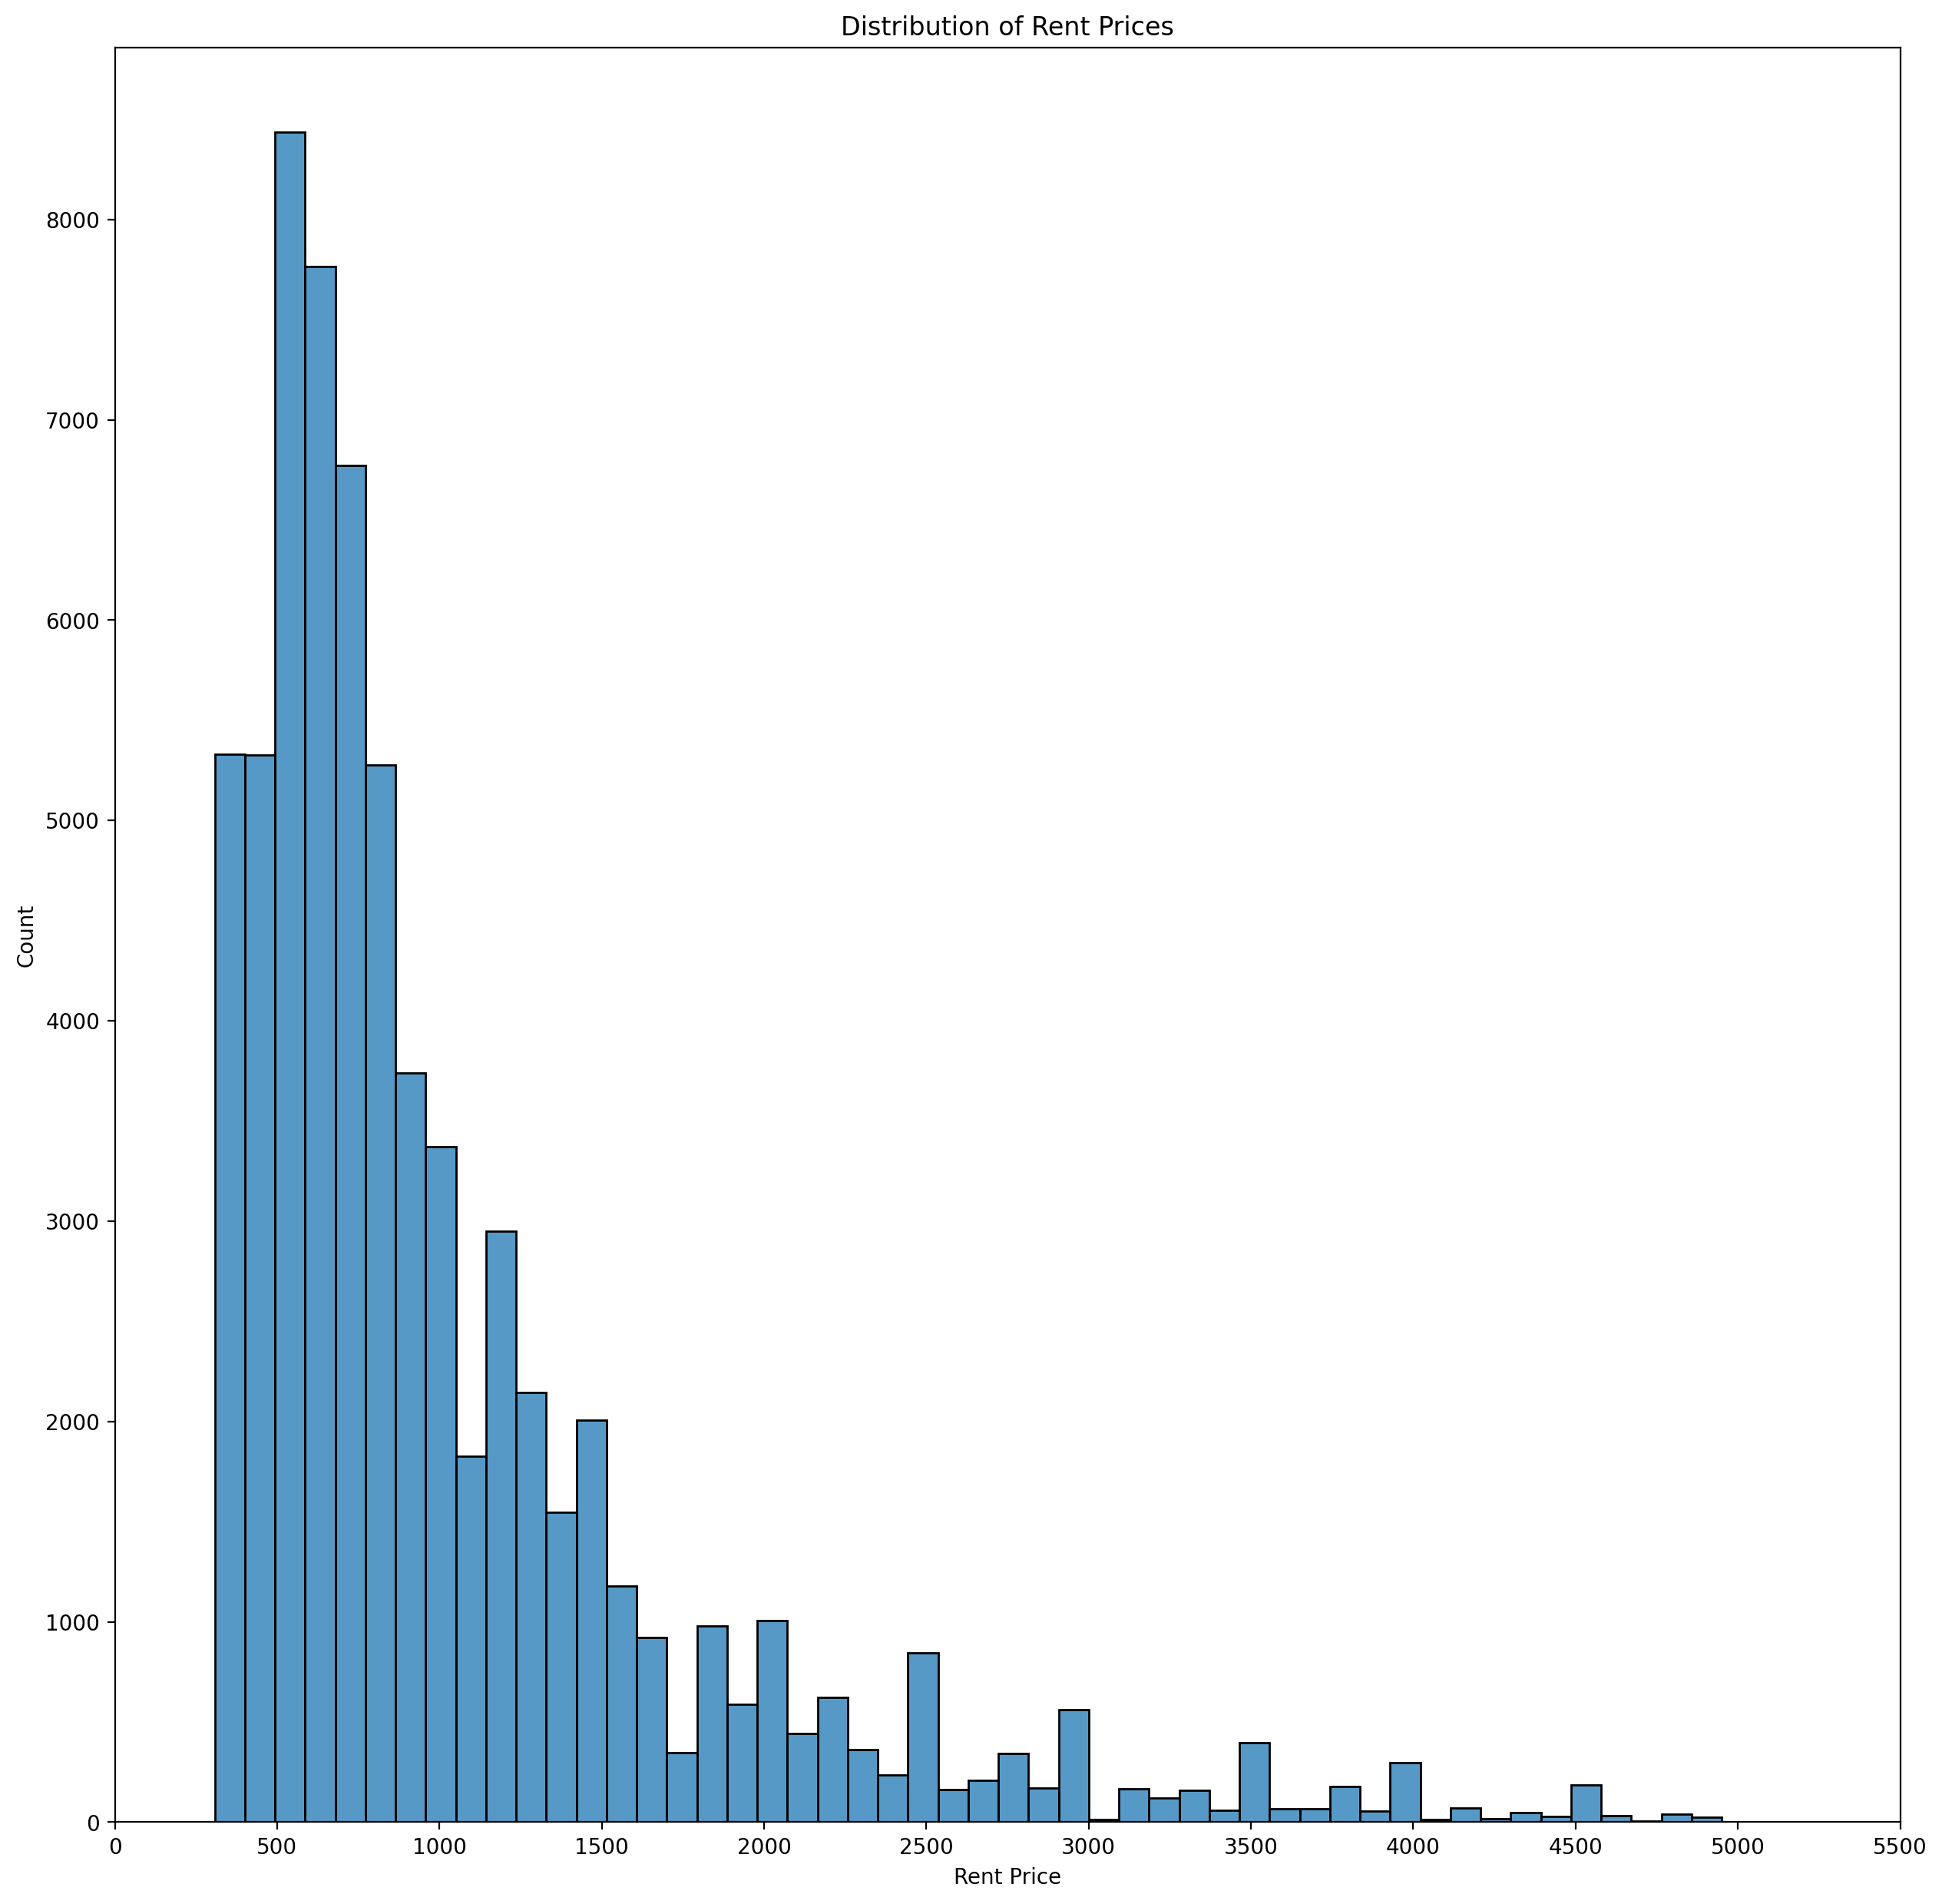

In [301]:
plt.figure(figsize=(15, 15), dpi=200)
sns.histplot(data=df_filtered_outliers,
             x=df_filtered_outliers.price,
             bins=50)
plt.xlabel('Rent Price')
plt.xticks(range(0, 6000, 500))
plt.title('Distribution of Rent Prices')
plt.show()

### Area vs Price

In [302]:
df_filtered_outliers['area'].describe()

count   67,500.00
mean        72.89
std         33.85
min          1.00
25%         50.00
50%         65.00
75%         90.00
max        300.00
Name: area, dtype: float64

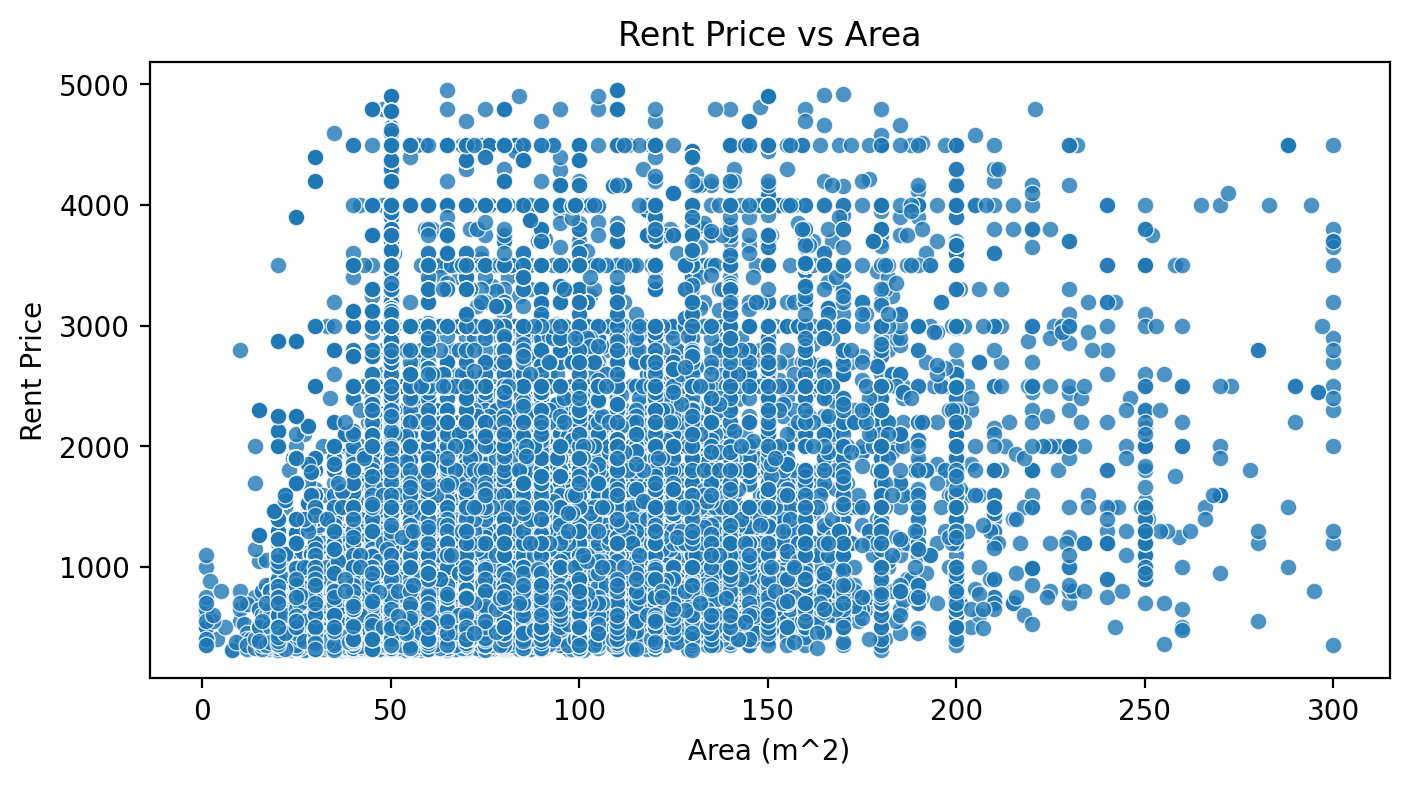

In [303]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df_filtered_outliers,
                x='area',
                y='price',
                alpha=0.8)

plt.xlabel('Area (m^2)')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Area')
plt.show()

In [304]:
df_data.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'TV system', 'external exposure', 'fiber optic',
       'electric gate', 'cellar', 'shared garden', 'private garden',
       'alarm system', 'doorman', 'pool', 'villa', 'entire property',
       'apartment', 'penthouse', 'loft', 'attic'],
      dtype='object')

### Property Count by Type

In [305]:
villa = df_filtered_outliers['villa'].sum()
apartment = df_filtered_outliers['apartment'].sum()
penthouse = df_filtered_outliers['penthouse'].sum()
loft = df_filtered_outliers['loft'].sum()
attic = df_filtered_outliers['attic'].sum()
villa

np.int64(1403)

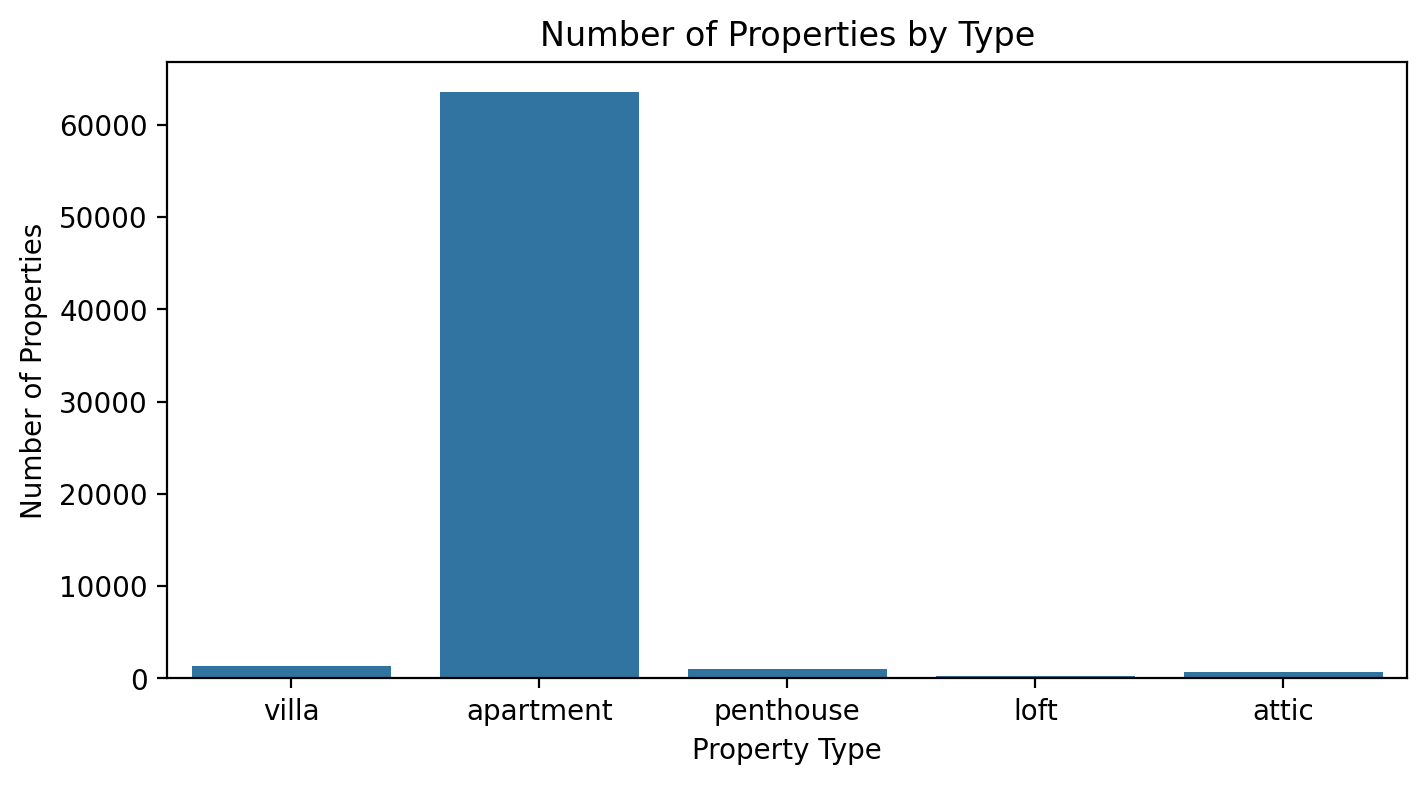

In [306]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=['villa', 'apartment', 'penthouse', 'loft', 'attic'],
            y=[villa, apartment, penthouse, loft, attic])
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Type')
plt.show()

### Average Rent by Property Type

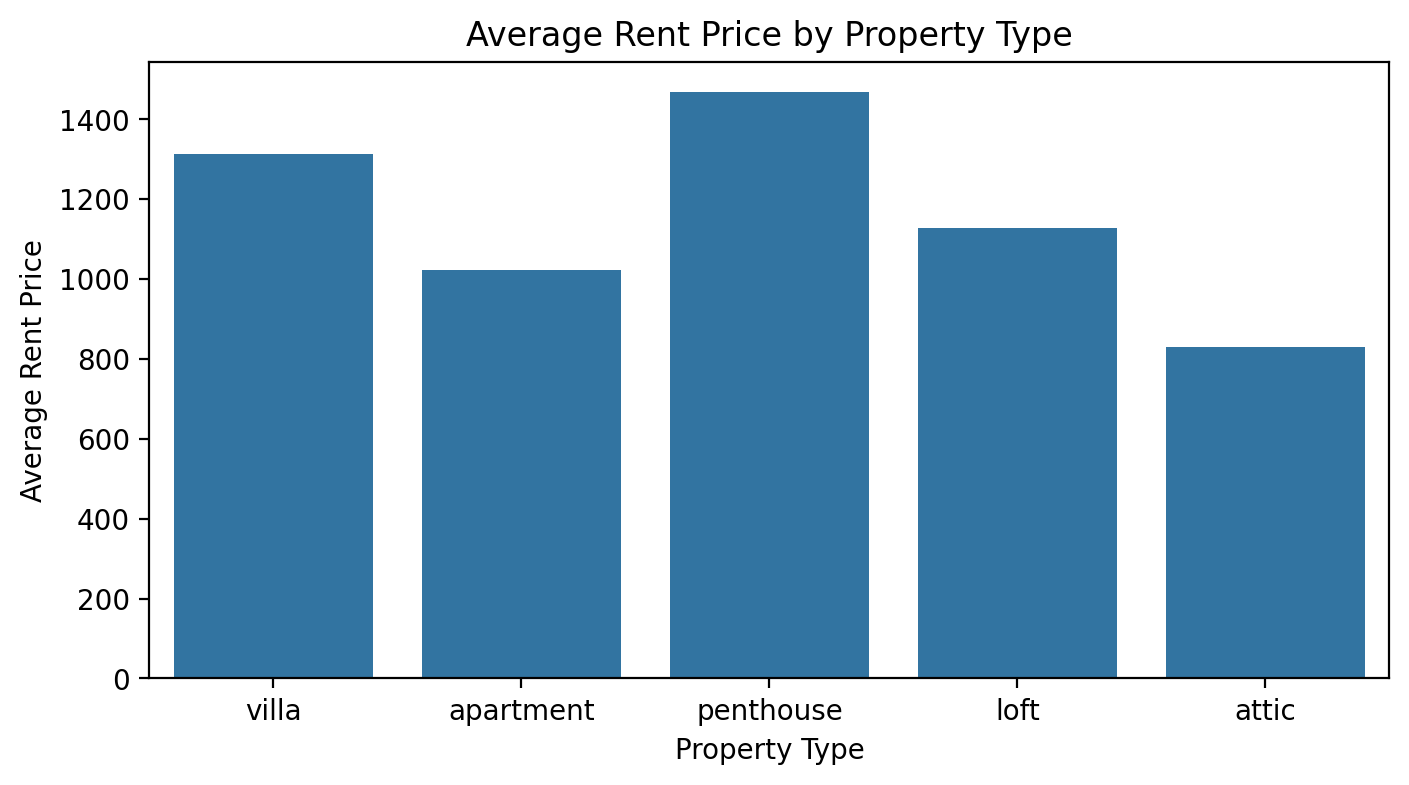

In [307]:
average_prices = {
    'villa': df_filtered_outliers[df_filtered_outliers['villa'] == 1]['price'].mean(),
    'apartment': df_filtered_outliers[df_filtered_outliers['apartment'] == 1]['price'].mean(),
    'penthouse': df_filtered_outliers[df_filtered_outliers['penthouse'] == 1]['price'].mean(),
    'loft': df_filtered_outliers[df_filtered_outliers['loft'] == 1]['price'].mean(),
    'attic': df_filtered_outliers[df_filtered_outliers['attic'] == 1]['price'].mean()
}

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=list(average_prices.keys()), y=list(average_prices.values()))
plt.xlabel('Property Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Property Type')
plt.show()

In [308]:
# Find the percentage of each property type
total_properties = villa + apartment + penthouse + loft + attic
villa_percent = (villa / total_properties) * 100
apartment_percent = (apartment / total_properties) * 100
penthouse_percent = (penthouse / total_properties) * 100
loft_percent = (loft / total_properties) * 100
attic_percent = (attic / total_properties) * 100

villa_percent, apartment_percent, penthouse_percent, loft_percent, attic_percent, total_properties, villa, apartment, penthouse, loft, attic

(np.float64(2.0960633450362294),
 np.float64(95.0220363038769),
 np.float64(1.4984686636288937),
 np.float64(0.3406289684021812),
 np.float64(1.0428027190558005),
 np.int64(66935),
 np.int64(1403),
 np.int64(63603),
 np.int64(1003),
 np.int64(228),
 np.int64(698))

In [309]:
# Drop every row of properties that are not apartments
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['apartment'] == 1]

In [310]:
# Drop the property type columns
df_filtered_outliers.drop(['villa', 'penthouse', 'loft', 'attic', 'apartment'], axis=1, inplace=True)

In [311]:
# Check the columns
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'external exposure', 'fiber optic', 'electric gate',
       'cellar', 'shared garden', 'private garden', 'pool'],
      dtype='object')

In [312]:
# Check the data head
df_filtered_outliers.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  area  \
12              0                0.50          1      2          1  ... 63.00   
13              0                1.00          1      1          0  ... 35.00   
15              1                0.50          1      2          0  ... 44.00   
16              0                0.33          1      3          0  ... 60.00   
19              0                0.33          1      3          0  ... 90.00   

   furnished  balcony  external exposure  fiber optic  electric gate  cellar  \
12         1        0                  0            1              1       0   
13         1        0                  0            0              1       0   
15         1        0                  0            0              0       0   
16         1        0                  1            0              0       0   
19         1        1                  0            0              0       0   

    shared garden  private garden  pool  
12              0               1     0  
13              0               0     0  
15              0               0     0  
16              0               0     0  
19              0               0     0  

[5 rows x 24 columns]

In [313]:
# Drop column: pool, sea view and private garden because of skewness
df_filtered_outliers.drop(['pool', 'sea view', 'private garden'], axis=1, inplace=True)

In [314]:
# Remove bathroom greater than 2
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['bathrooms'] <= 2]

In [315]:
average_prices_by_region = df_filtered_outliers.groupby('region')['price'].mean().sort_values()
average_prices_by_region

region
Liguria                   350.00
l-aquila                  400.00
umbria                    491.96
genova                    504.29
basilicata                563.54
palermo                   565.00
piemonte                  619.65
molise                    653.90
marche                    677.47
puglia                    680.26
torino                    700.00
bari                      700.00
sicilia                   716.26
catanzaro                 725.00
napoli                    750.00
liguria                   767.84
calabria                  774.74
abruzzo                   784.46
friuli-venezia-giulia     801.61
campania                  838.60
veneto                    877.82
trentino-alto-adige       940.41
valle-d-aosta             964.40
emilia-romagna            969.77
lazio                   1,018.83
sardegna                1,109.82
trieste                 1,126.78
toscana                 1,146.31
emilia-Romagna          1,160.08
venezia                 1,225.00
mil

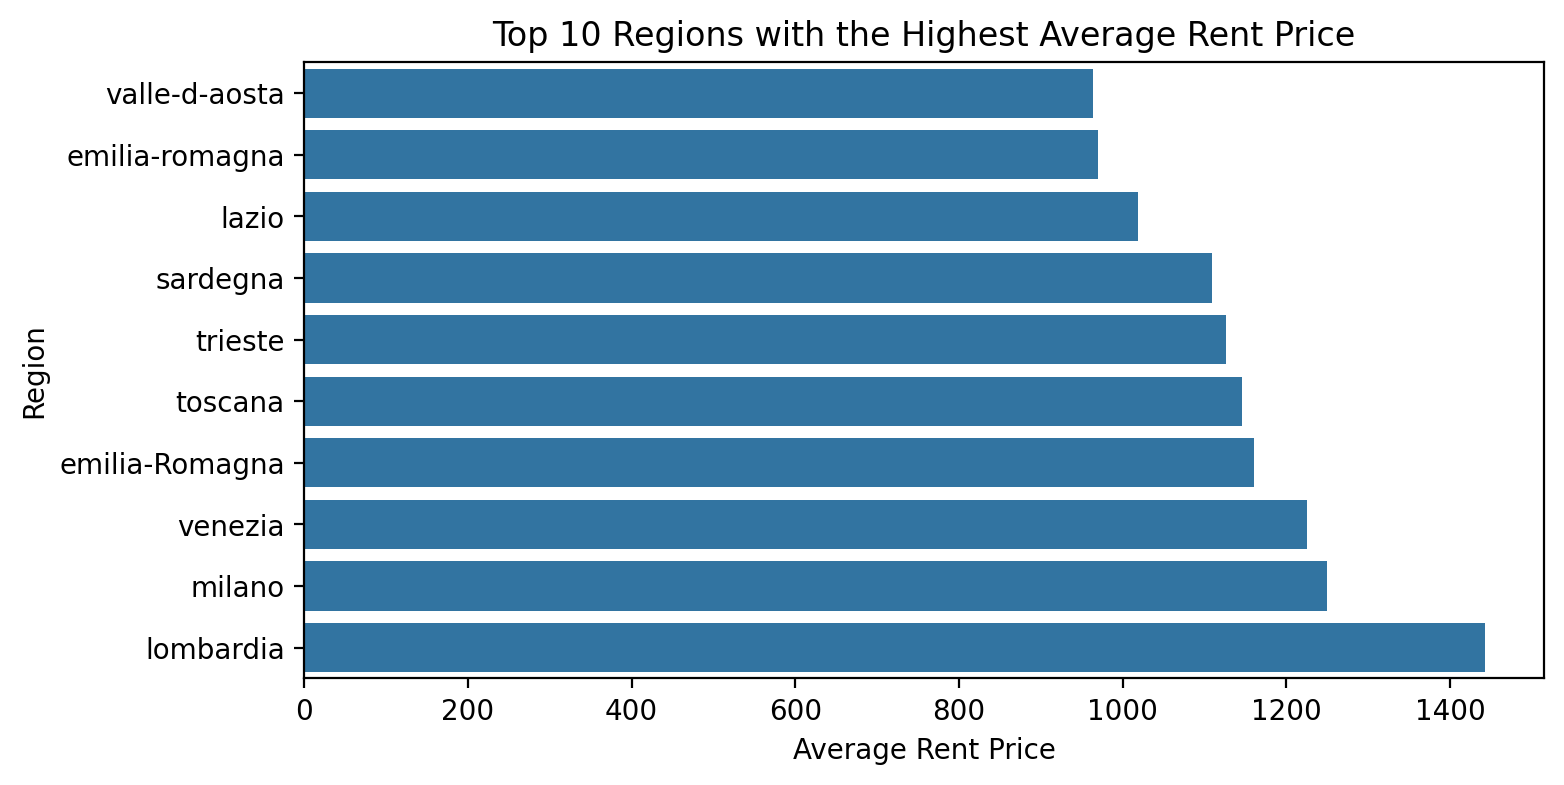

In [316]:
top_10_regions_high = average_prices_by_region.tail(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_high.values, y=top_10_regions_high.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()


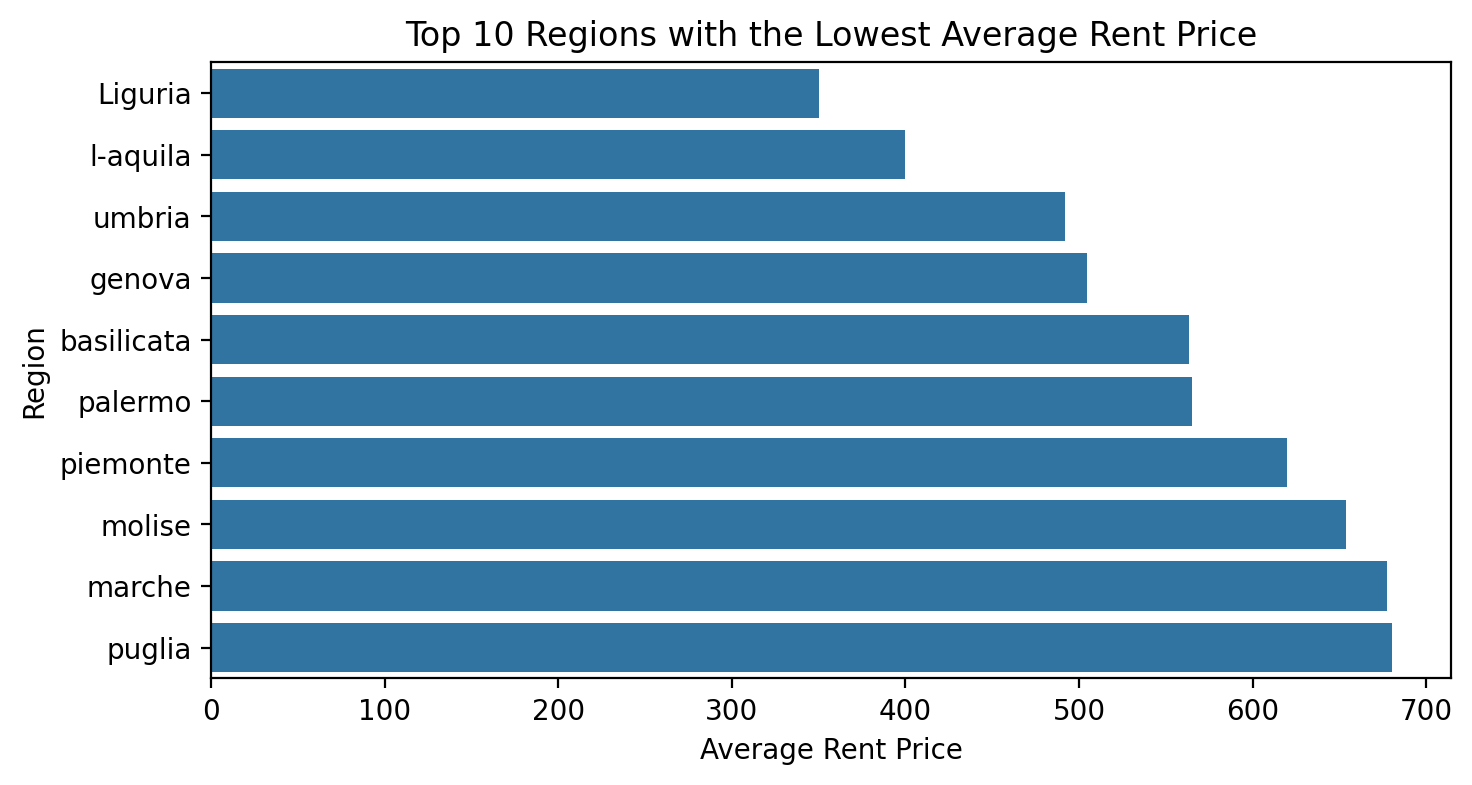

In [317]:
top_10_regions_low = average_prices_by_region.head(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_low.values, y=top_10_regions_low.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Lowest Average Rent Price')
plt.show()

In [318]:
df_filtered_outliers['price'].describe()

count   62,673.00
mean     1,008.10
std        713.51
min        308.00
25%        550.00
50%        750.00
75%      1,200.00
max      4,950.00
Name: price, dtype: float64

In [319]:
fig = px.box(df_filtered_outliers, y='price')
fig.show()

In [320]:
# Drop the energy column with value ','
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['energy class'] != ',']

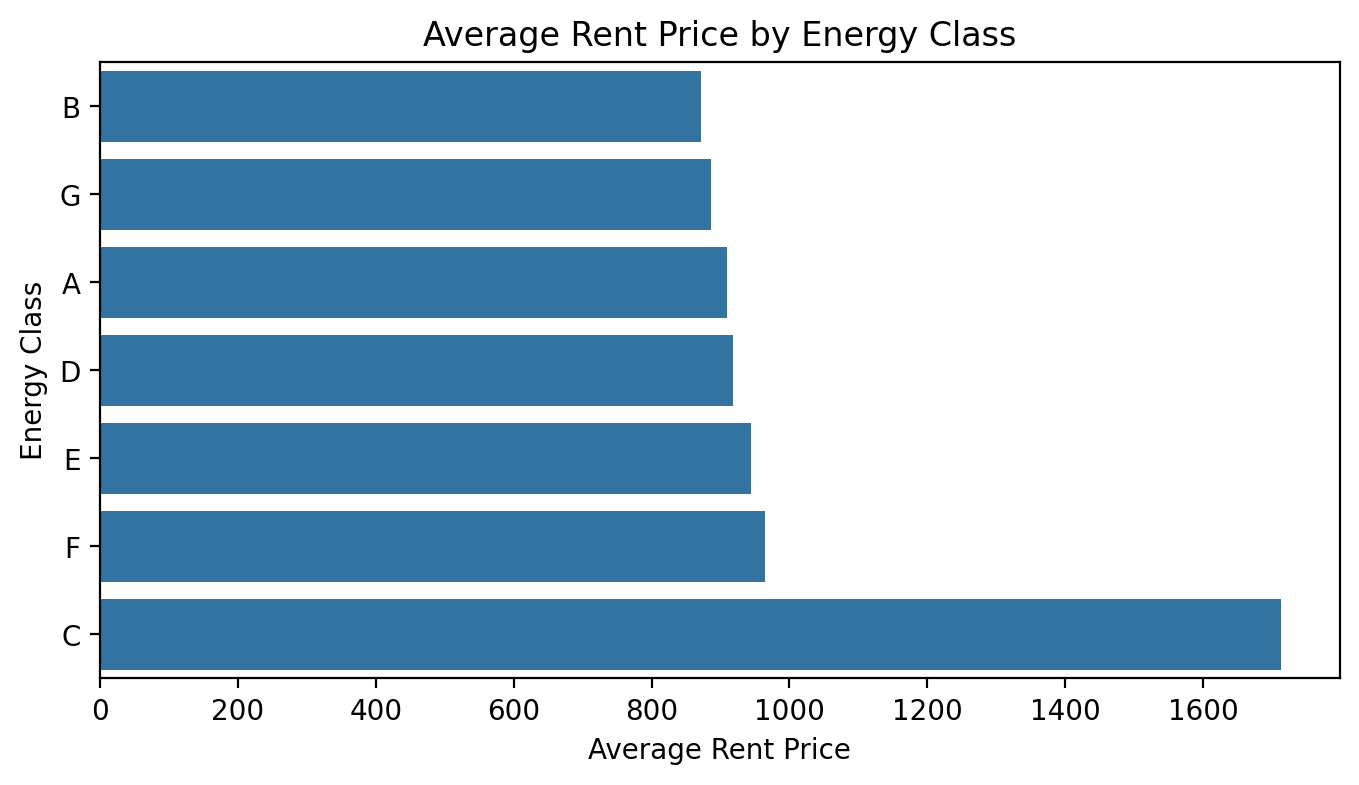

In [321]:
average_prices_by_energy_class = df_filtered_outliers.groupby('energy class')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_energy_class.values, y=average_prices_by_energy_class.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Energy Class')
plt.title('Average Rent Price by Energy Class')
plt.show()

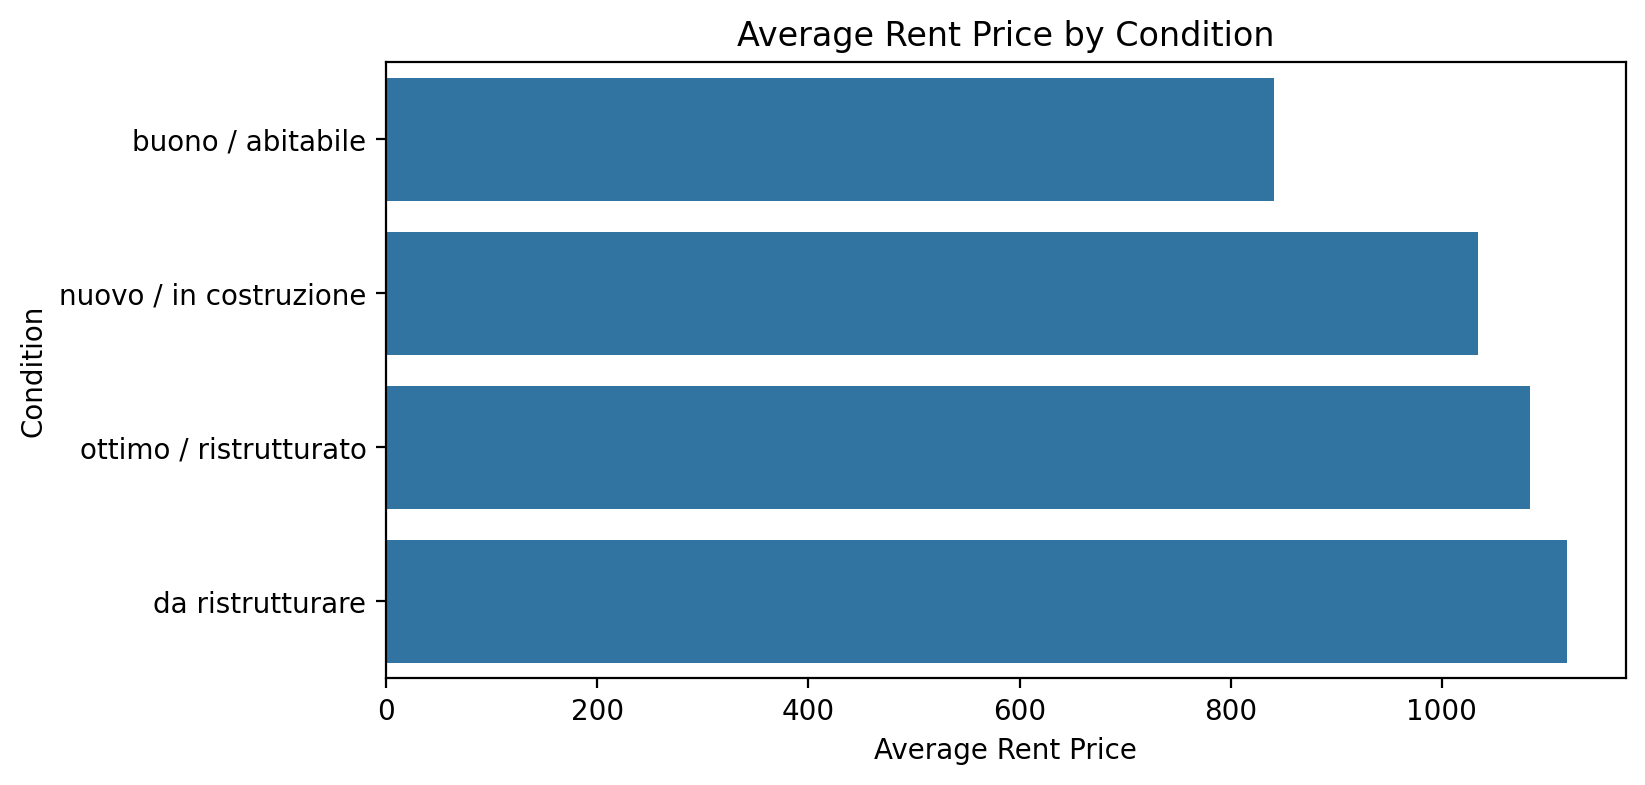

In [322]:
average_prices_by_condition = df_filtered_outliers.groupby('condition')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_condition.values, y=average_prices_by_condition.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Condition')
plt.title('Average Rent Price by Condition')
plt.show()

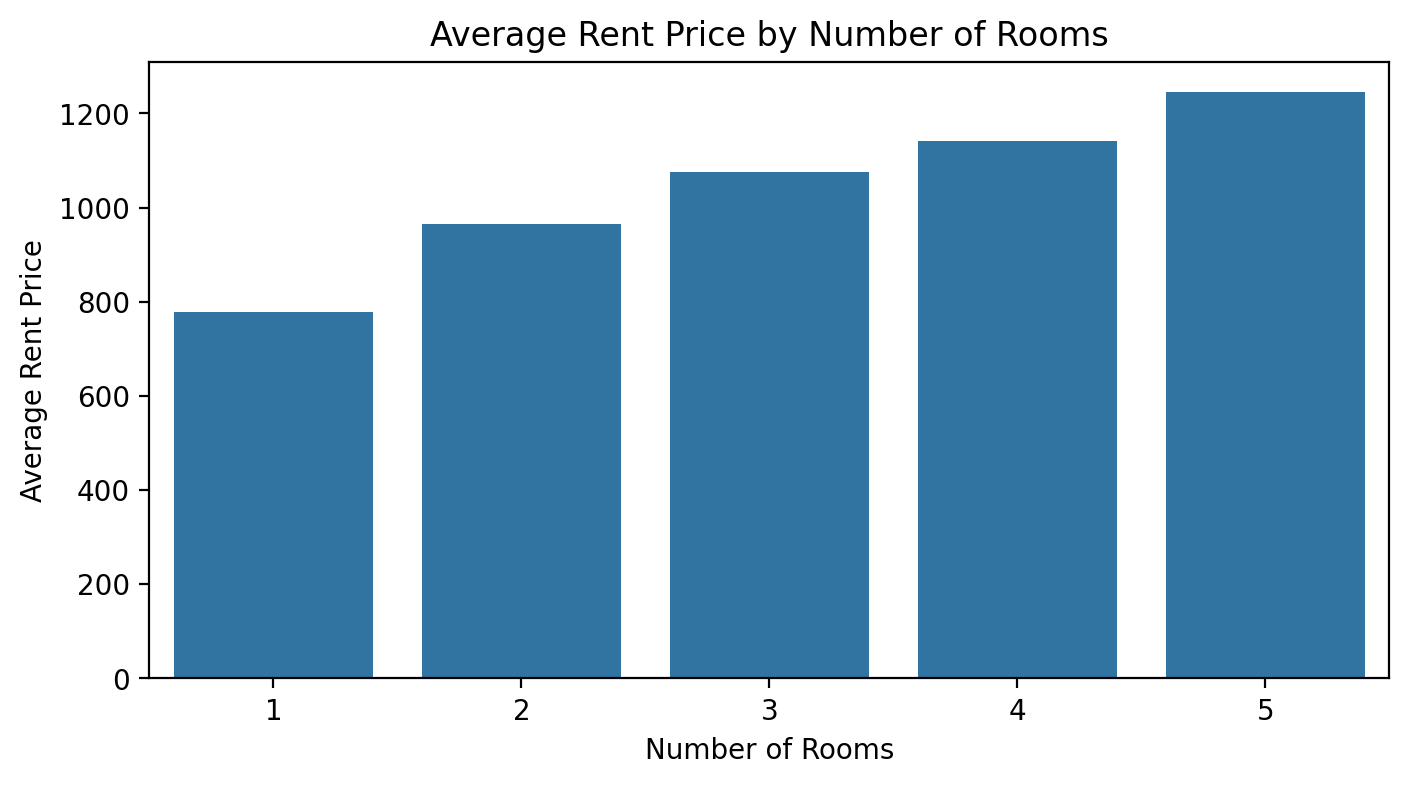

In [323]:
average_prices_by_rooms = df_filtered_outliers.groupby('rooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_rooms.index, y=average_prices_by_rooms.values)
plt.xlabel('Number of Rooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Rooms')
plt.show()

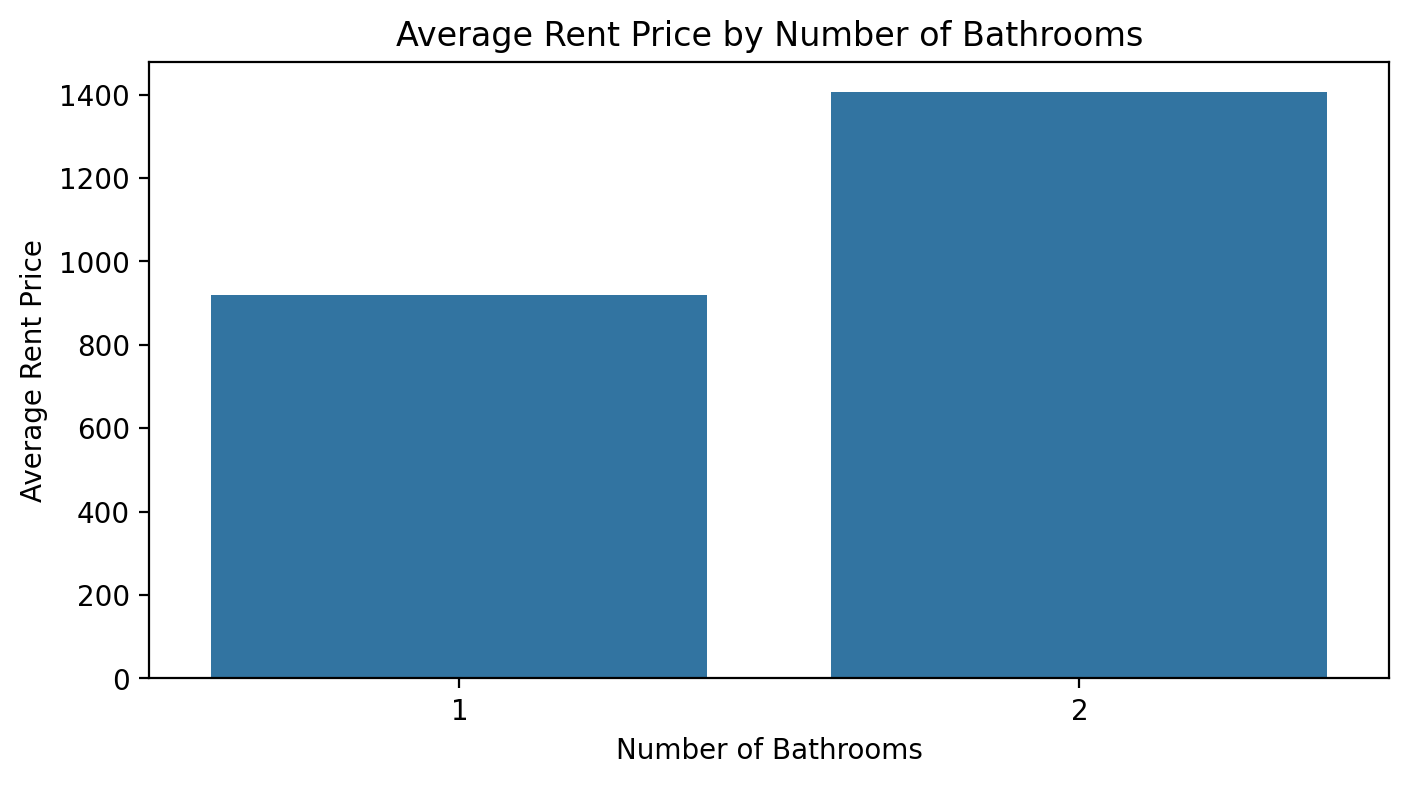

In [324]:
average_prices_by_bathrooms = df_filtered_outliers.groupby('bathrooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_bathrooms.index, y=average_prices_by_bathrooms.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Bathrooms')
plt.show()

### Regression Plot

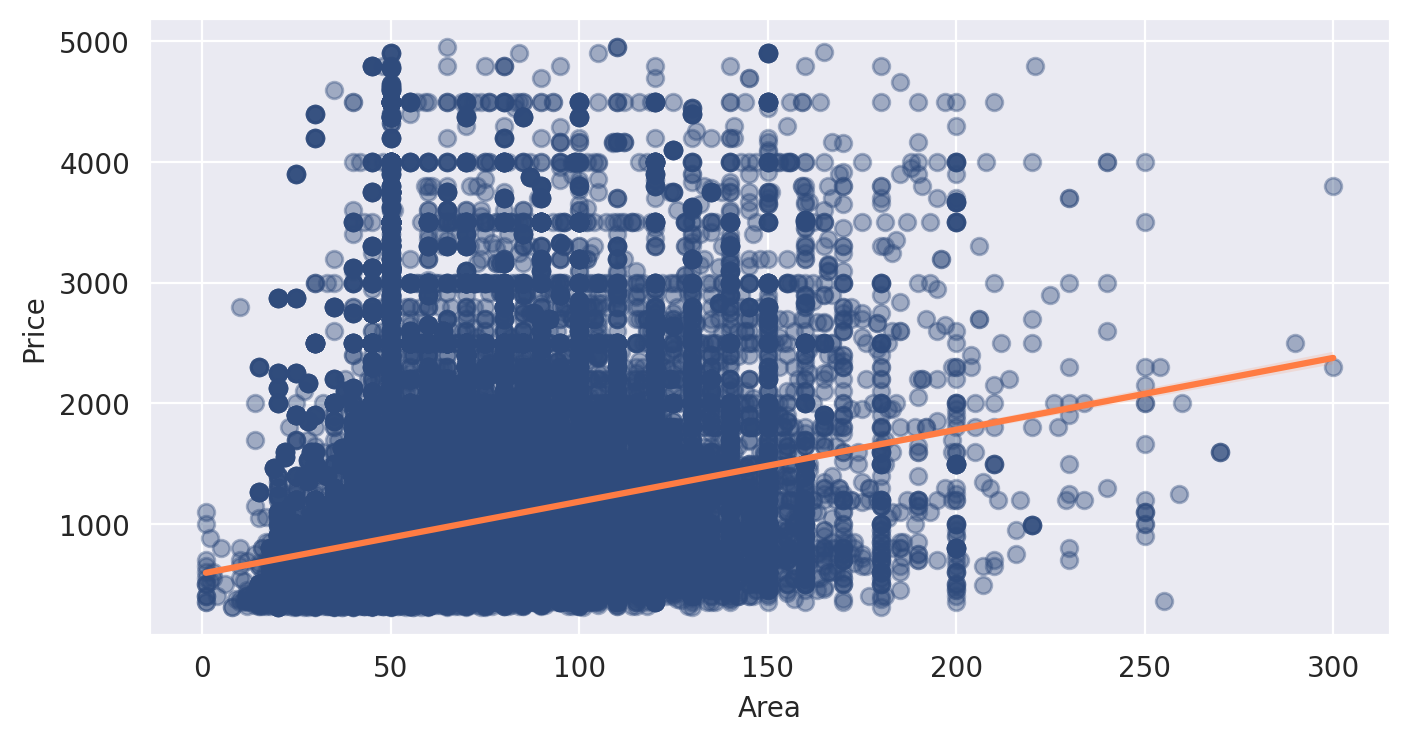

In [325]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax= sns.regplot(data=df_filtered_outliers,
            x='area',
            y='price',
            scatter_kws = {'alpha': 0.4,'color': "#2f4b7c"},
            line_kws = {'color': '#ff7c43'})


  ax.set(
        ylabel='Price',
        xlabel='Area',)


## Train Model using Linear Regression

In [326]:
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'central heating', 'area', 'furnished', 'balcony',
       'external exposure', 'fiber optic', 'electric gate', 'cellar',
       'shared garden'],
      dtype='object')

In [327]:
# Drop unnecessary columns
df_filtered_outliers.drop(['datetime', 'bathrooms per room', 'neighborhood'], axis=1, inplace=True)

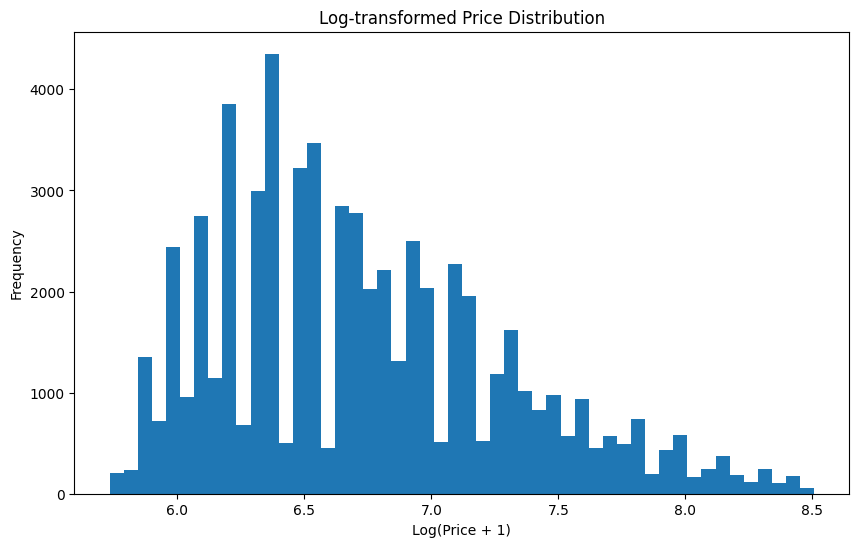

In [328]:
# Fixing the skewness of the price column
log_price = np.log1p(df_filtered_outliers['price'])

plt.figure(figsize=(10,6))
plt.hist(log_price, bins=50)
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

In [329]:
# # Replace the price column with the log transformed price
df_filtered_outliers['price'] = log_price

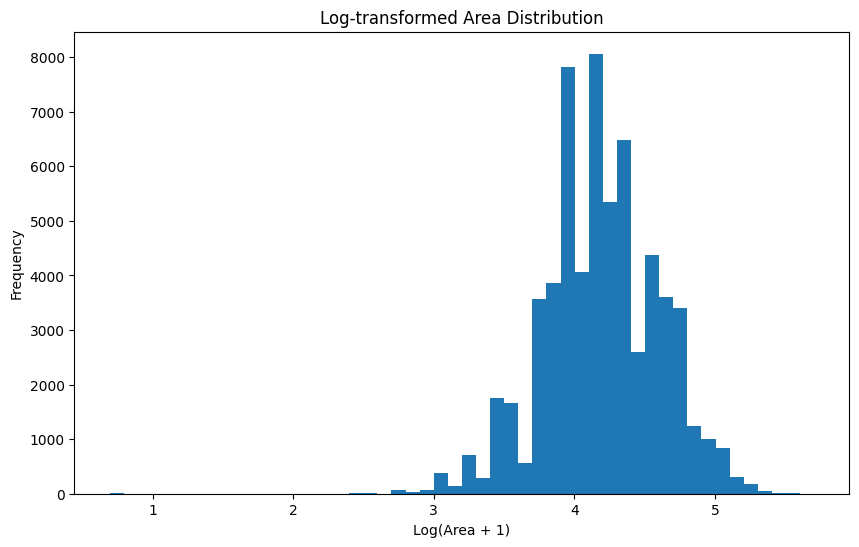

In [330]:
# Fixing the skewness of the area column
log_price = np.log1p(df_filtered_outliers['area'])

plt.figure(figsize=(10,6))
plt.hist(log_price, bins=50)
plt.title('Log-transformed Area Distribution')
plt.xlabel('Log(Area + 1)')
plt.ylabel('Frequency')
plt.show()

In [331]:
# # Replace the area column with the log transformed price
df_filtered_outliers['area'] = log_price

In [332]:
# Count values of each region
df_filtered_outliers['region'].value_counts()

region
lombardia                15400
lazio                    11531
piemonte                  7850
emilia-romagna            7403
veneto                    3836
liguria                   3390
toscana                   3258
campania                  3055
sicilia                   1459
marche                    1397
umbria                    1194
puglia                     906
abruzzo                    635
trentino-alto-adige        391
calabria                   248
sardegna                   169
friuli-venezia-giulia      127
valle-d-aosta               83
basilicata                  82
molise                      68
emilia-Romagna              49
trieste                     18
catanzaro                   12
genova                       7
palermo                      2
venezia                      2
napoli                       2
Liguria                      1
milano                       1
torino                       1
l-aquila                     1
bari                         1
N

In [333]:
# Replace all the regions with less than 7000 properties with 'Other'
regions_to_replace = df_filtered_outliers['region'].value_counts()[df_filtered_outliers['region'].value_counts() < 7000].index
df_filtered_outliers['region'] = df_filtered_outliers['region'].replace(regions_to_replace, 'Other')

df_filtered_outliers['region'].value_counts()


region
Other             20395
lombardia         15400
lazio             11531
piemonte           7850
emilia-romagna     7403
Name: count, dtype: int64

In [334]:
# Count values of each city
df_filtered_outliers['city'].value_counts()

city
Milano                 11299
Roma                    8784
Torino                  3716
Bologna                 2468
Genova                  2062
                       ...  
Ponza                      1
Vicalvi                    1
Trevi nel Lazio            1
Ponzano Romano             1
Montopoli di Sabina        1
Name: count, Length: 2788, dtype: int64

In [335]:
# Replace all the cities with less than 2000 properties with 'Other'
regions_to_replace = df_filtered_outliers['city'].value_counts()[df_filtered_outliers['city'].value_counts() < 2000].index
df_filtered_outliers['city'] = df_filtered_outliers['city'].replace(regions_to_replace, 'Other')

df_filtered_outliers['city'].value_counts()

city
Other      34250
Milano     11299
Roma        8784
Torino      3716
Bologna     2468
Genova      2062
Name: count, dtype: int64

In [336]:
df_filtered_outliers['condition'].value_counts()

condition
ottimo / ristrutturato    41345
buono / abitabile         19172
nuovo / in costruzione     1847
da ristrutturare            215
Name: count, dtype: int64

In [337]:
# Drop all the condition columns with the value nuovo / in costruzione and da ristrutturare
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['condition'] != 'nuovo / in costruzione']
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['condition'] != 'da ristrutturare']

df_filtered_outliers['condition'].value_counts()

condition
ottimo / ristrutturato    41345
buono / abitabile         19172
Name: count, dtype: int64

In [338]:
df_filtered_outliers['energy class'].value_counts()

energy class
G    25356
C     7595
F     7310
E     6041
D     5853
A     4935
B     3427
Name: count, dtype: int64

In [339]:
# Replace A, B, C, D, E with more efficient and F, G with less efficient
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['A', 'B', 'C', 'D', 'E'], 1)
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['F', 'G'], 0)

df_filtered_outliers['energy class'].value_counts()

C:\Users\ahame\AppData\Local\Temp\ipykernel_17356\1368860311.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



energy class
0    32666
1    27851
Name: count, dtype: int64

In [340]:
df_filtered_outliers['top floor'].value_counts()

top floor
0    52331
1     8186
Name: count, dtype: int64

In [341]:
df_filtered_outliers['cellar'].value_counts()

cellar
0    48334
1    12183
Name: count, dtype: int64

In [342]:
df_filtered_outliers['Building Layout'] = np.select(
    [
        (df_filtered_outliers['cellar'] == 0) & (df_filtered_outliers['top floor'] == 0),
        (df_filtered_outliers['cellar'] == 1) & (df_filtered_outliers['top floor'] == 0),
        (df_filtered_outliers['cellar'] == 0) & (df_filtered_outliers['top floor'] == 1),
        (df_filtered_outliers['cellar'] == 1) & (df_filtered_outliers['top floor'] == 1)
    ],
    [
        0,  # No cellar or top floor
        1,  # Cellar only
        2,  # Top floor only
        3   # Both cellar and top floor
    ]
)

# Display the first few rows to verify the new feature
df_filtered_outliers[['cellar', 'top floor', 'Building Layout']].head()

cellar  top floor  Building Layout
13       0          0                0
15       0          0                0
16       0          0                0
19       0          0                0
20       0          0                0

In [343]:
df_filtered_outliers.drop(['cellar', 'top floor'], axis=1, inplace=True)
df_filtered_outliers['Building Layout'].value_counts()

Building Layout
0    41700
1    10631
2     6634
3     1552
Name: count, dtype: int64

In [344]:
# Add a feature - Is both furnished and has central heating
df_filtered_outliers['Furnished and Central Heating'] = np.where((df_filtered_outliers['furnished'] == 1) & (df_filtered_outliers['central heating'] == 1), 1, 0)
df_filtered_outliers.head()

region     city  price  parking spots  bathrooms  rooms  \
13        piemonte   Torino   6.22              0          1      1   
15  emilia-romagna  Bologna   6.72              1          1      2   
16           Other   Genova   6.31              0          1      3   
19           Other    Other   6.22              0          1      3   
20           Other    Other   6.22              1          1      2   

                 condition  energy class  central heating  area  furnished  \
13       buono / abitabile             1                0  3.58          1   
15  ottimo / ristrutturato             1                1  3.81          1   
16  ottimo / ristrutturato             0                0  4.11          1   
19  ottimo / ristrutturato             0                0  4.51          1   
20       buono / abitabile             0                0  4.26          0   

    balcony  external exposure  fiber optic  electric gate  shared garden  \
13        0                  0            0              1              0   
15        0                  0            0              0              0   
16        0                  1            0              0              0   
19        1                  0            0              0              0   
20        1                  0            0              1              0   

    Building Layout  Furnished and Central Heating  
13                0                              0  
15                0                              1  
16                0                              0  
19                0                              0  
20                0                              0

In [345]:
encoded_df = pd.get_dummies(df_filtered_outliers, columns=['region', 'city', 'condition'], dtype=int, drop_first=True)

In [346]:
encoded_df.head()

price  parking spots  bathrooms  rooms  energy class  central heating  \
13   6.22              0          1      1             1                0   
15   6.72              1          1      2             1                1   
16   6.31              0          1      3             0                0   
19   6.22              0          1      3             0                0   
20   6.22              1          1      2             0                0   

    area  furnished  balcony  external exposure  ...  region_emilia-romagna  \
13  3.58          1        0                  0  ...                      0   
15  3.81          1        0                  0  ...                      1   
16  4.11          1        0                  1  ...                      0   
19  4.51          1        1                  0  ...                      0   
20  4.26          0        1                  0  ...                      0   

    region_lazio  region_lombardia  region_piemonte  city_Genova  city_Milano  \
13             0                 0                1            0            0   
15             0                 0                0            0            0   
16             0                 0                0            1            0   
19             0                 0                0            0            0   
20             0                 0                0            0            0   

    city_Other  city_Roma  city_Torino  condition_ottimo / ristrutturato  
13           0          0            1                                 0  
15           0          0            0                                 1  
16           0          0            0                                 1  
19           1          0            0                                 1  
20           1          0            0                                 0  

[5 rows x 25 columns]

In [347]:
# Temporarily drop the categorical columns
# df_filtered_outliers.drop(['region', 'city', 'neighborhood', 'condition', 'energy class'], axis=1, inplace=True)

In [348]:
# Temporarily drop the categorical columns
input_columns = df_filtered_outliers.columns

In [349]:
input_columns = encoded_df.columns.drop('price')

In [350]:
input_columns

Index(['parking spots', 'bathrooms', 'rooms', 'energy class',
       'central heating', 'area', 'furnished', 'balcony', 'external exposure',
       'fiber optic', 'electric gate', 'shared garden', 'Building Layout',
       'Furnished and Central Heating', 'region_emilia-romagna',
       'region_lazio', 'region_lombardia', 'region_piemonte', 'city_Genova',
       'city_Milano', 'city_Other', 'city_Roma', 'city_Torino',
       'condition_ottimo / ristrutturato'],
      dtype='object')

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
X = pd.DataFrame(encoded_df, columns=input_columns)
y = pd.DataFrame(encoded_df, columns=['price'])

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [354]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'parking spots'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'energy class'}>,
        <Axes: title={'center': 'central heating'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'external exposure'}>,
        <Axes: title={'center': 'fiber optic'}>],
       [<Axes: title={'center': 'electric gate'}>,
        <Axes: title={'center': 'shared garden'}>,
        <Axes: title={'center': 'Building Layout'}>,
        <Axes: title={'center': 'Furnished and Central Heating'}>,
        <Axes: title={'center': 'region_emilia-romagna'}>],
       [<Axes: title={'center': 'region_lazio'}>,
        <Axes: title={'center': 'region_lombardia'}>,
        <Axes: title={'center': 'region_piemonte'}>,
        <Axes: title={'center': 'city_Genova'}>,
        <Axes: title={'cente

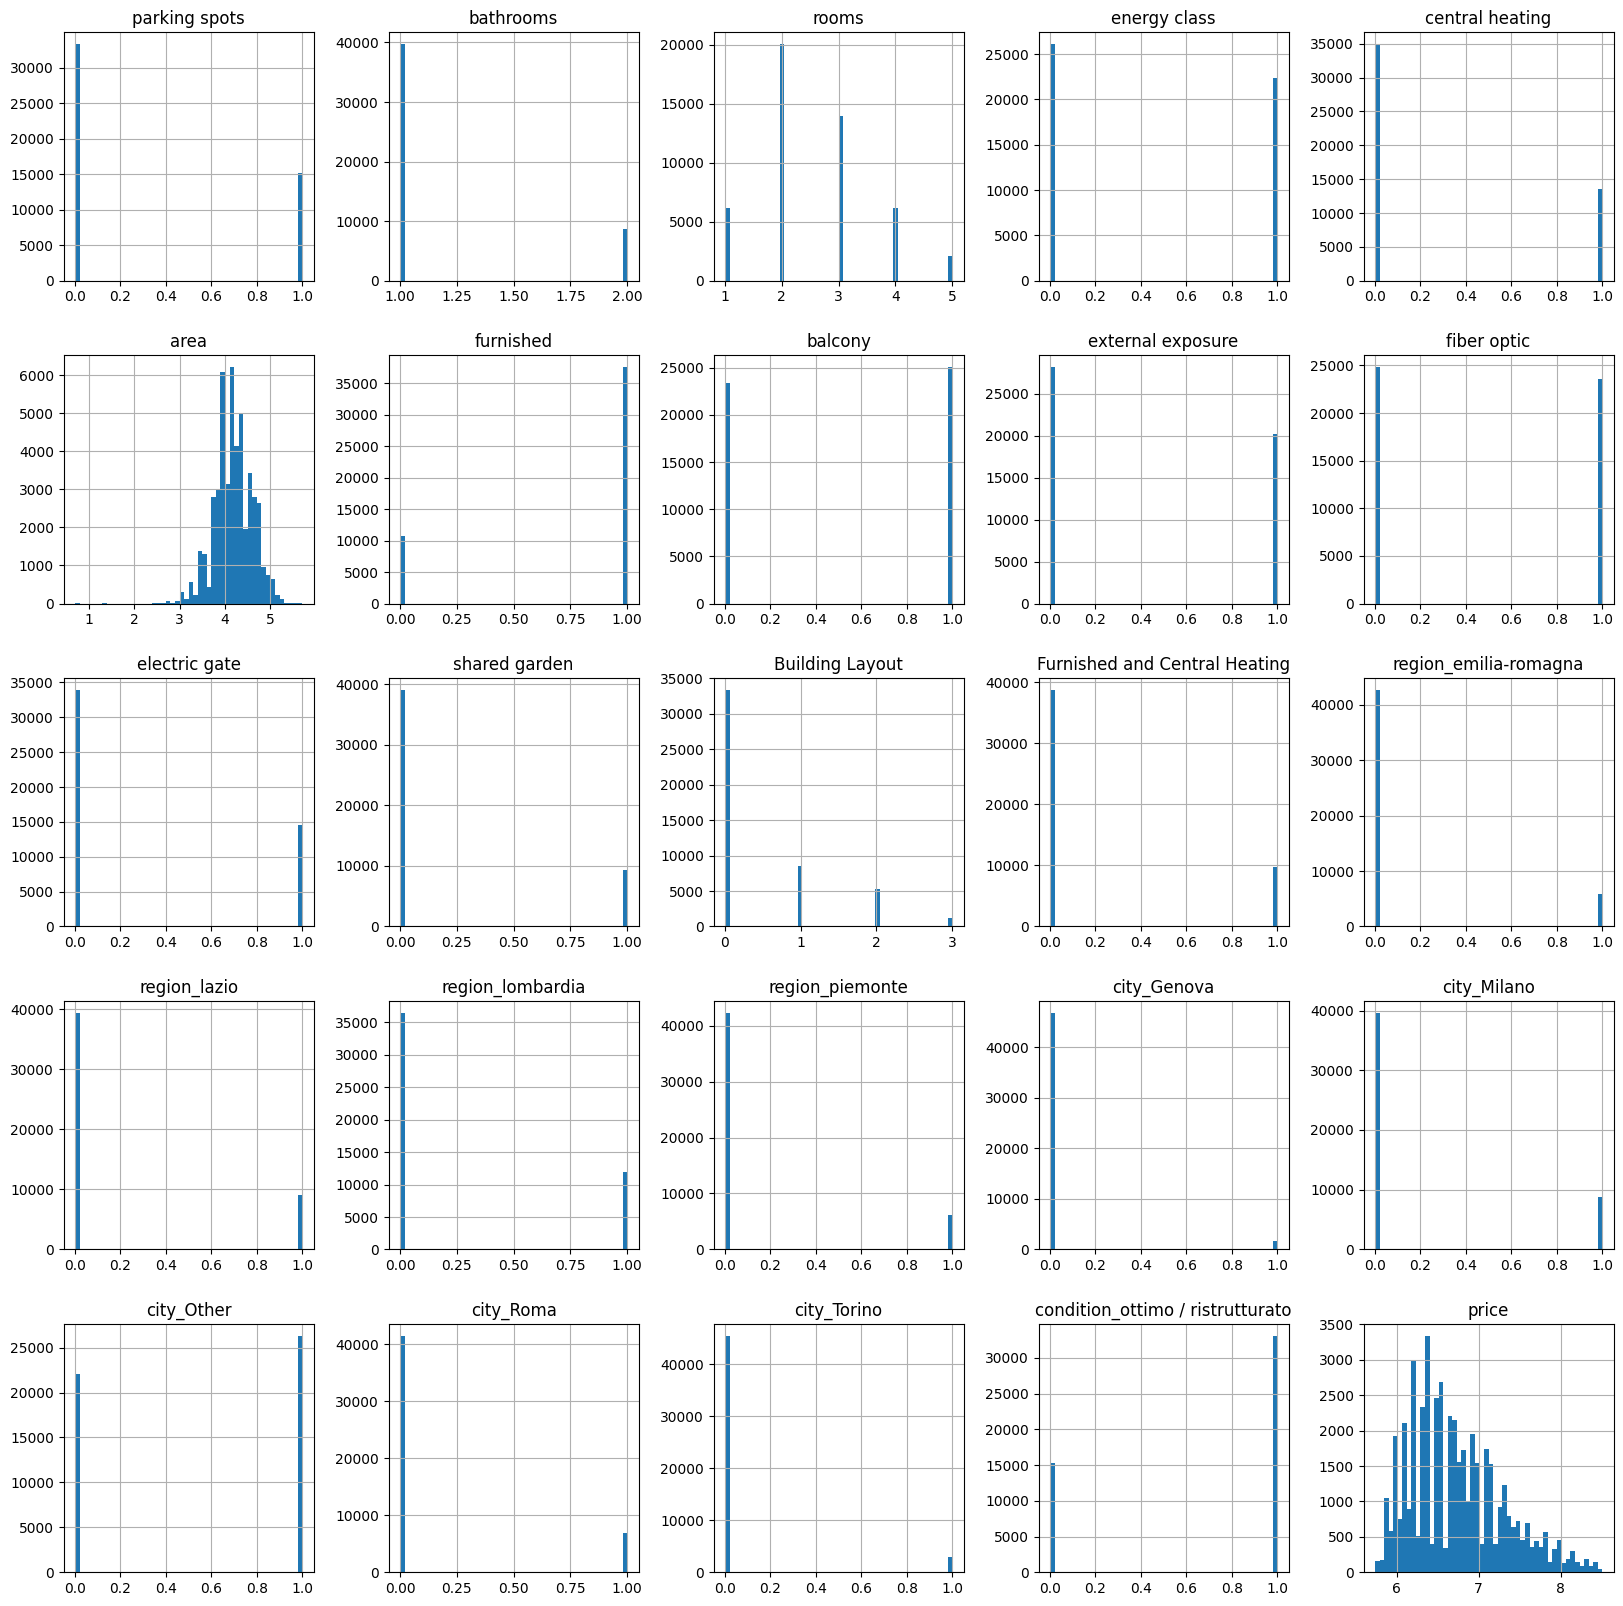

In [355]:
train_data.hist(figsize=(20, 20), bins=50)

<Axes: >

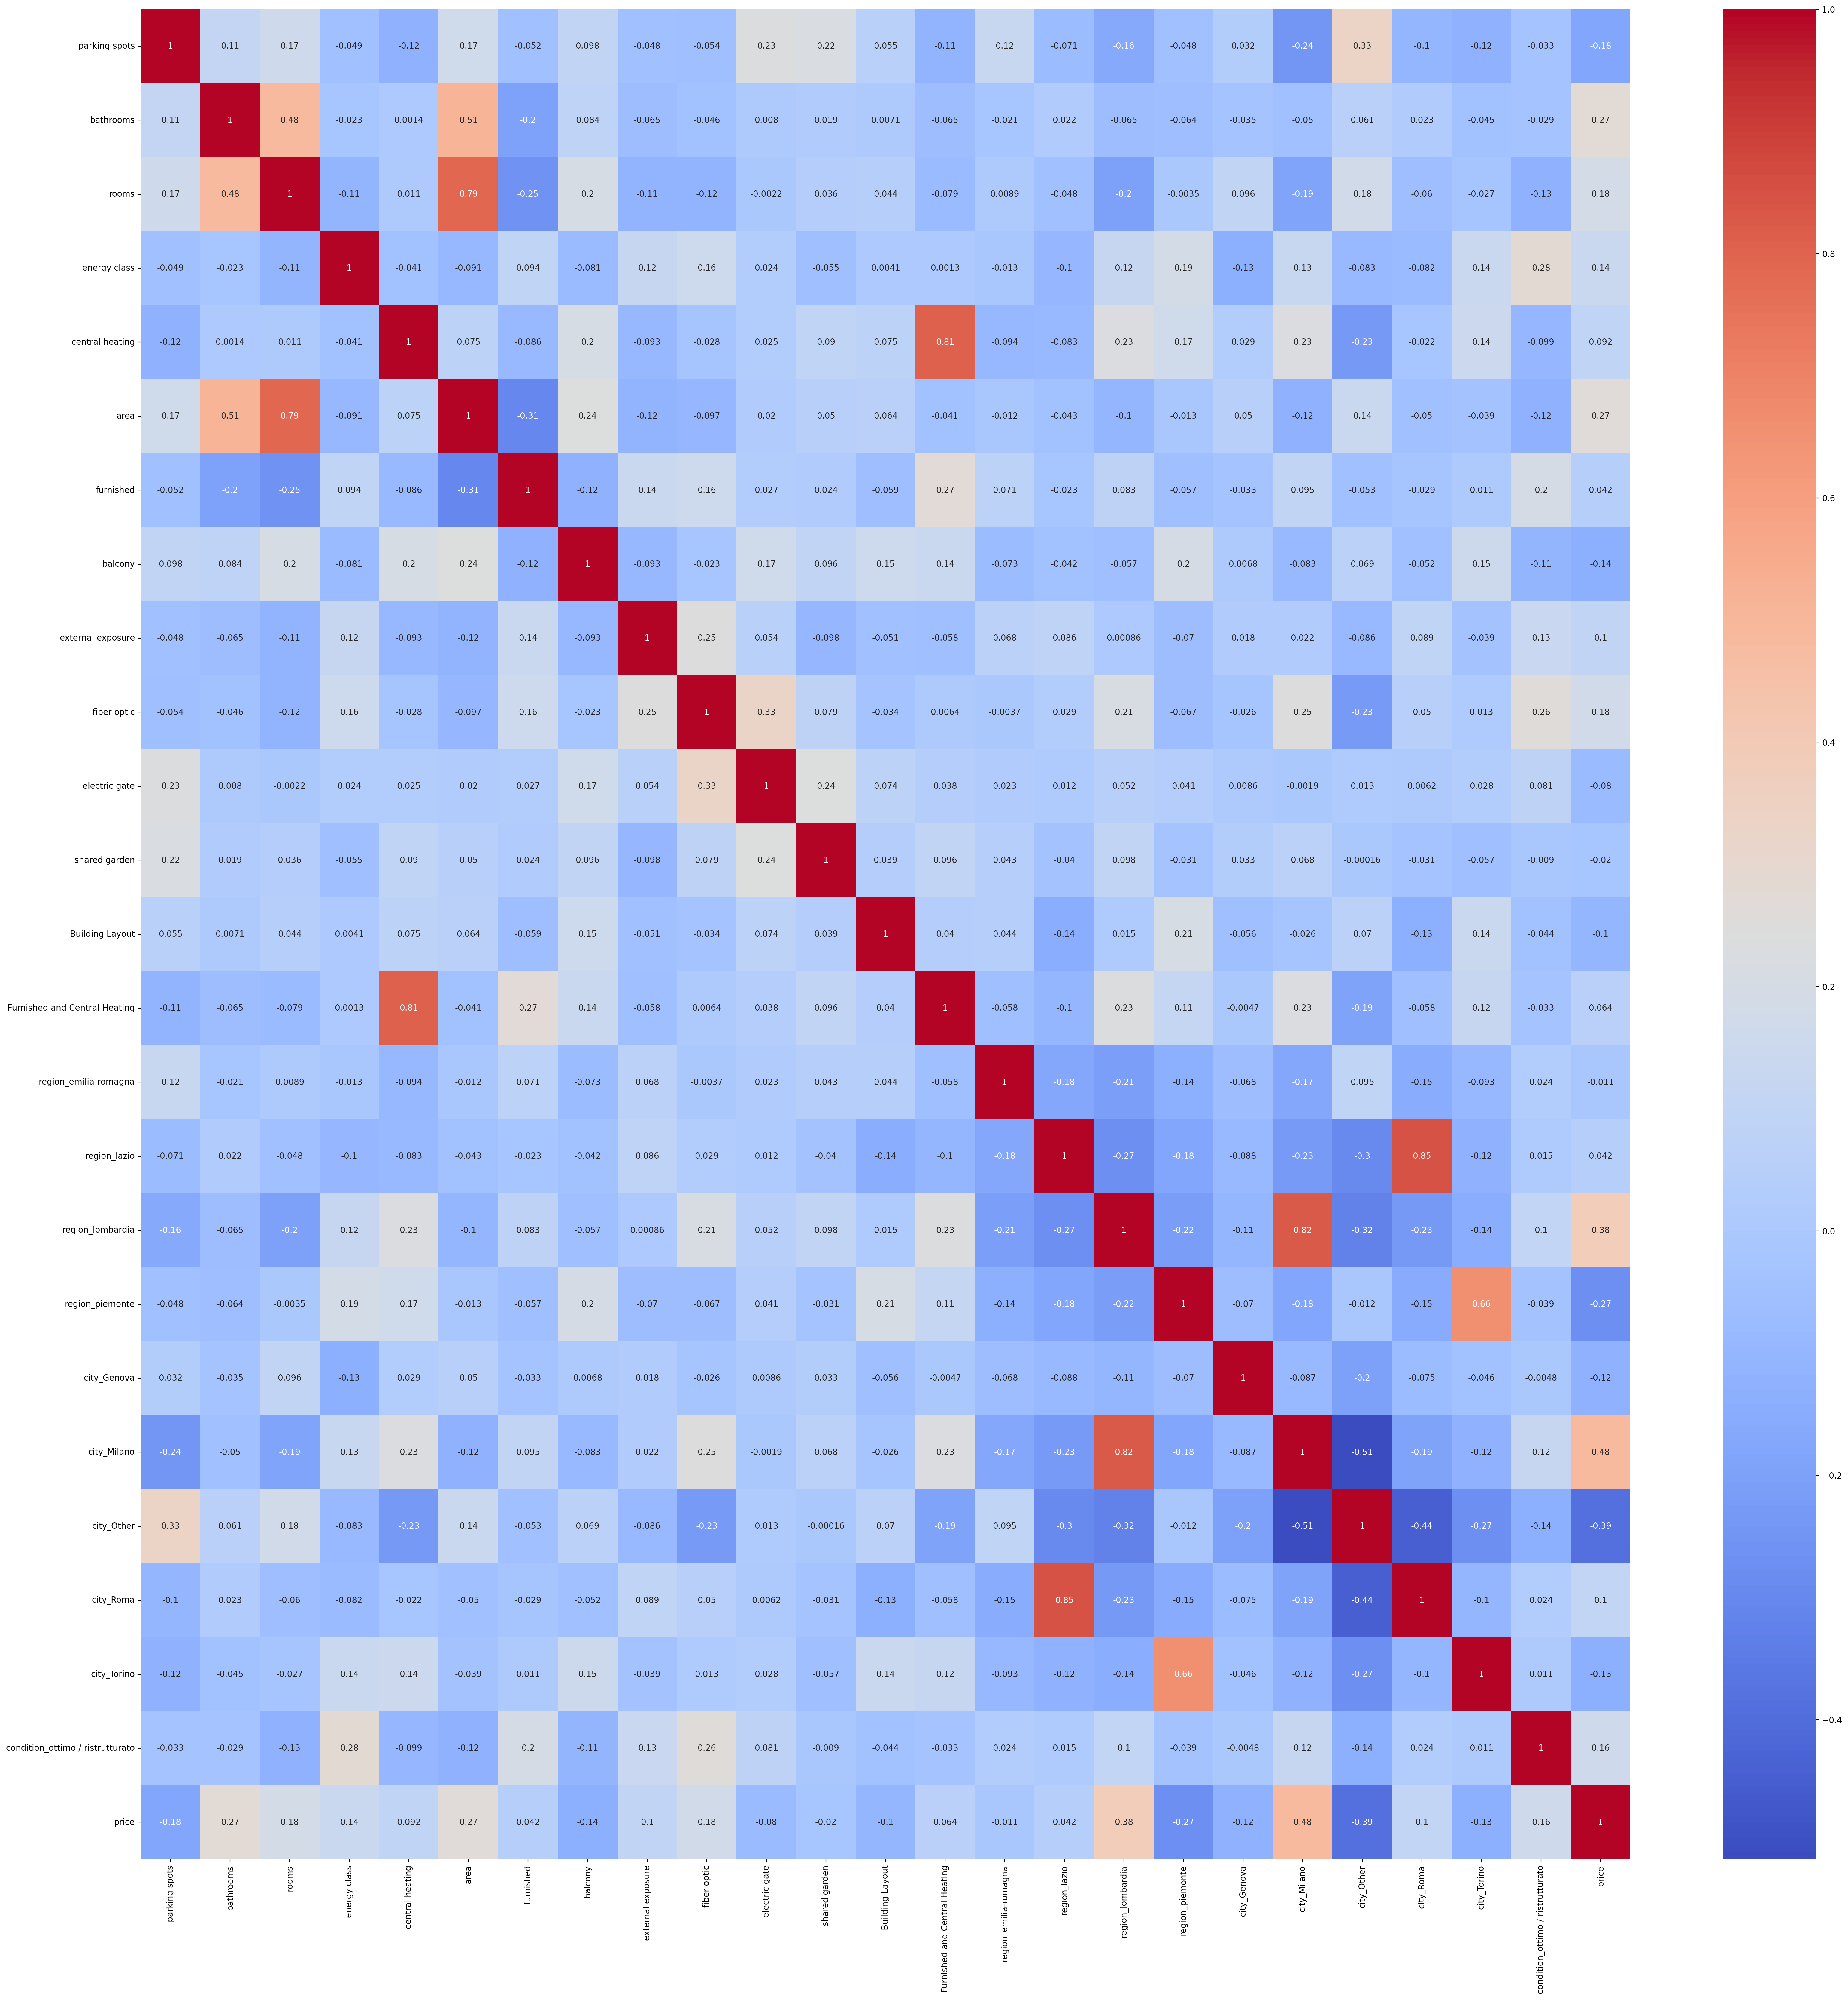

In [356]:
# Encode 'energy class' column
train_data['energy class'] = train_data['energy class'].replace({'More Efficient': 1, 'Less Efficient': 0})

plt.figure(figsize=(40, 40), dpi=200)
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [357]:
train_data.head()

parking spots  bathrooms  rooms  energy class  central heating  area  \
69929               0          1      3             1                1  4.26   
44674               0          1      2             0                1  4.11   
104253              0          1      2             1                0  3.93   
78093               0          1      1             0                0  3.33   
122352              0          1      1             1                0  3.43   

        furnished  balcony  external exposure  fiber optic  ...  region_lazio  \
69929           1        1                  1            1  ...             0   
44674           1        1                  0            1  ...             0   
104253          1        0                  1            1  ...             0   
78093           1        0                  1            1  ...             0   
122352          1        0                  1            1  ...             0   

        region_lombardia  region_piemonte  city_Genova  city_Milano  \
69929                  1                0            0            1   
44674                  0                1            0            0   
104253                 1                0            0            1   
78093                  0                0            0            0   
122352                 0                0            0            0   

        city_Other  city_Roma  city_Torino  condition_ottimo / ristrutturato  \
69929            0          0            0                                 1   
44674            0          0            1                                 1   
104253           0          0            0                                 1   
78093            1          0            0                                 1   
122352           1          0            0                                 1   

        price  
69929    7.50  
44674    6.22  
104253   7.67  
78093    6.31  
122352   6.11  

[5 rows x 25 columns]

In [358]:
# %pip install scikit-learn

## Prediction using RandomForestRegressor Algorithm

In [359]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

C:\Users\ahame\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6230607485610444

In [360]:
# from sklearn.model_selection import GridSearchCV

# param_grid = { 
#     'n_estimators': [150, 200, 250], #250
#     'max_features': [4, 8, 16], #8
#     'min_samples_split': [6,  8,  10] #10
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# grid_search.fit(X_train_s, y_train)

# print(grid_search.best_estimator_)
# grid_search.best_estimator_.score(X_test_s, y_test)

In [361]:
best_forest = RandomForestRegressor(max_features=8, min_samples_split=10, n_estimators=250)
best_forest.fit(X_train, y_train)
best_forest.score(X_test, y_test)

C:\Users\ahame\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.658479862176035

In [362]:
predicted_vals = best_forest.predict(X_train)

# Assuming y_train is a DataFrame, convert it to a Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()  # Convert DataFrame to Series if it has a single column

# Ensure predicted_vals is a Series
predicted_vals = pd.Series(predicted_vals, index=y_train.index)

# Compute residuals
residuals = y_train - predicted_vals


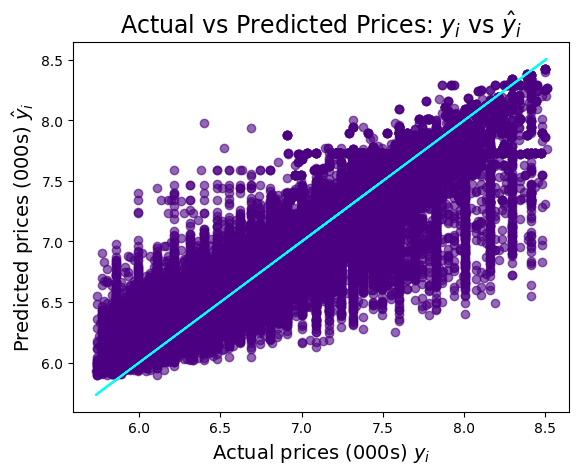

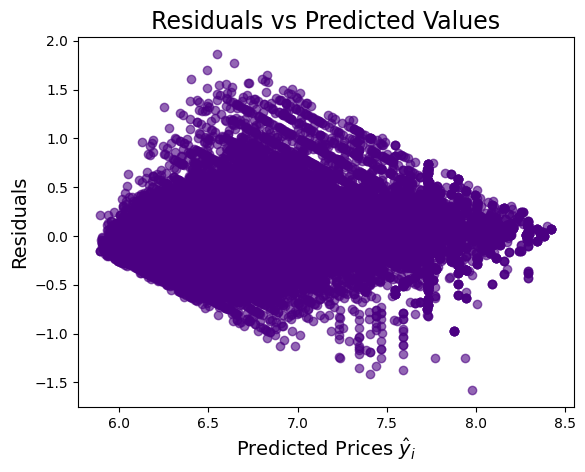

In [382]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(r'Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$', fontsize=17)
plt.xlabel(r'Actual prices (000s) $y_i$', fontsize=14)
plt.ylabel(r'Predicted prices (000s) $\hat{y}_i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel(r'Predicted Prices $\hat{y}_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


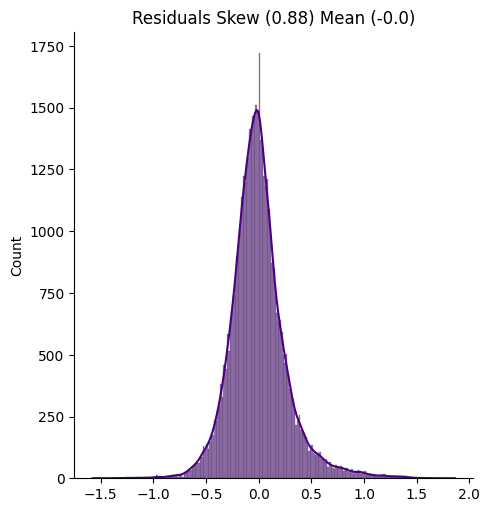

In [364]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

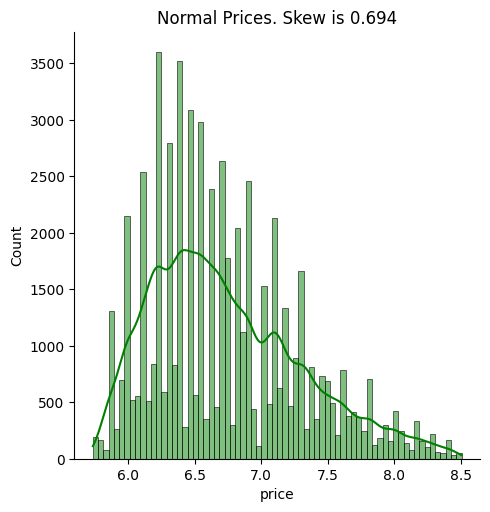

In [365]:
tgt_skew = encoded_df['price'].skew()
sns.displot(encoded_df['price'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

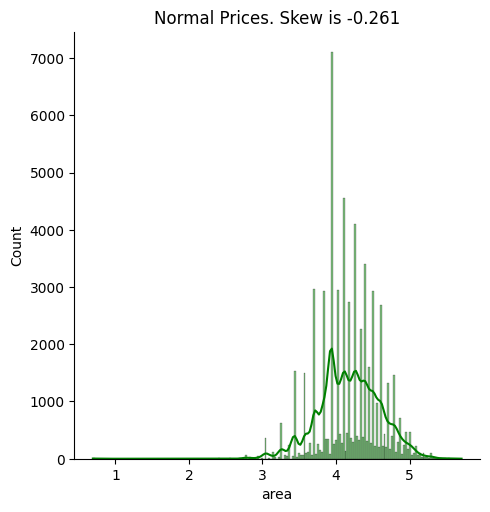

In [366]:
tgt_skew = encoded_df['area'].skew()
sns.displot(encoded_df['area'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

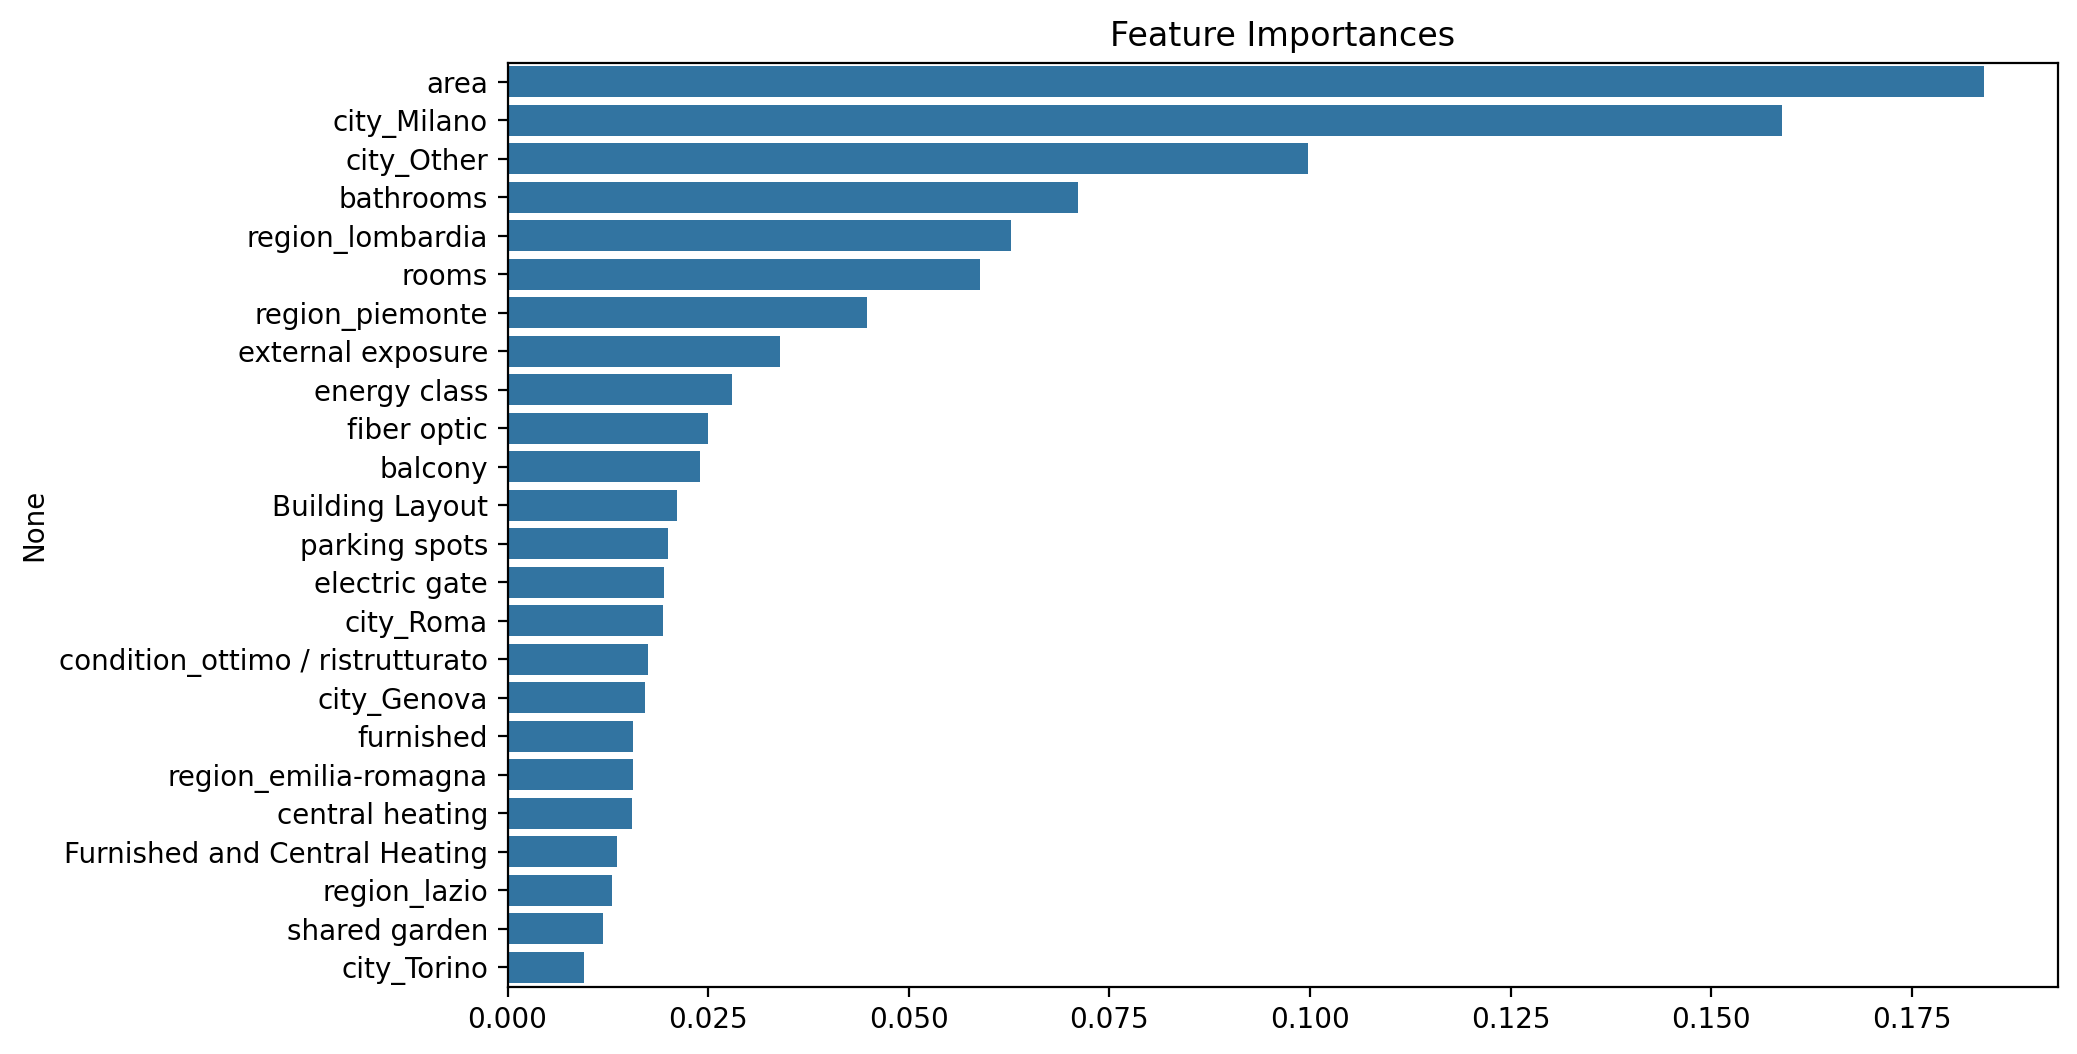

In [371]:
# Feature Importances
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title('Feature Importances')
plt.show()


In [389]:
# Average Values in the Dataset
features = encoded_df.drop(['price'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

parking spots  bathrooms  rooms  energy class  central heating  area  \
0           0.31       1.18   2.54          0.46             0.28  4.18   

   furnished  balcony  external exposure  fiber optic  ...  \
0       0.78     0.52               0.42         0.49  ...   

   region_emilia-romagna  region_lazio  region_lombardia  region_piemonte  \
0                   0.12          0.19              0.25             0.13   

   city_Genova  city_Milano  city_Other  city_Roma  city_Torino  \
0         0.03         0.18        0.54       0.14         0.06   

   condition_ottimo / ristrutturato  
0                              0.68  

[1 rows x 24 columns]

In [390]:
log_estimate = best_forest.predict(property_stats)[0]
print(f'The log price estimate is €{log_estimate:.3f}')

euro_est = np.expm1(log_estimate)
print(f'The property is estimated to be worth €{euro_est:.6f}')

The log price estimate is €6.751
The property is estimated to be worth €853.716966
